# Custo Médico Pessoal

## Introdução

   O projeto de Machine Learning proposto tem como objetivo desenvolver um modelo preditivo para estimar os custos médicos de uma pessoa com base em diversas variáveis. O tema escolhido é o "Custo Médico Pessoal", uma tarefa essencial para aprimorar o planejamento financeiro de indivíduos e seguradoras, bem como para fornecer insights valiosos para o setor de saúde e políticas públicas.  
   
   A análise exploratória de dados desempenha um papel crucial nesse projeto, pois nos permitirá entender a natureza dos dados disponíveis, identificar padrões e tendências, além de explorar as relações entre as diferentes características que influenciam os custos médicos. Para alcançar esse objetivo, utilizaremos um conjunto de dados abrangente e diversificado, contendo informações sobre diversos atributos, como idade, gênero, índice de massa corporal (IMC), hábitos tabagistas, região de residência, número de filhos, entre outros fatores relevantes.

   Ao final do projeto, teremos desenvolvido um modelo de regressão, capaz de fazer previsões acerca dos custos médicos de uma pessoa com base nas características fornecidas. Além disso, uma análise detalhada dos fatores que mais influenciam os custos médicos será feita, permitindo que as seguradoras ajustem suas políticas de precificação e que os indivíduos tomem decisões mais informadas sobre suas despesas de saúde.


## Variáveis

- Age: Idade do primeiro beneficiário

- Sex: Gênero

- BMI: Índice de Massa Corporal

- Children: Numero de dependentes

- Smoker: Fumante

- Region: Área residencial do beneficiário

- Charges: Custos médicos individuais cobrados pelo seguro de saúde

## Importação dos dados

Primordialmente, importaremos as bibliotecas e os dados que serão utilizados.

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Retirando mensagens de aviso
warnings.filterwarnings('ignore')
# Cores e tema
cores = ["#a6cee3", "#1f78b4","#b2df8a", "#33a02c","#fb9a99", "#e31a1c","#fdbf6f", "#ff7f00","#cab2d6", "#6a3d9a","#ffff99", "#b15928"]
sns.set_theme()

In [2]:
# Importando o conjunto de dados
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Podemos ver que há 7 variáveis em nosso conjunto de dados, sendo: "Idade","Sexo","IMC","Filhos","Fumante","Regiao" e "Custo".

In [3]:
# Verificando o tipo das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Destas, 4 são variáveis quantitativas e 3 são variáveis qualitativas.

In [4]:
# Descrevendo as variáveis quantitativas
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Aqui podemos ver algumas características das nossas variáveis quantitativas. É possível analisar que o banco de dados cobre pessoas de 18 a 64 anos de idade, o preço varia de 1122 até 63770 sendo a média 13270.

In [5]:
# Excluindo linhas duplicadas 
df.drop_duplicates(inplace=True)

In [6]:
# Verificando se há linhas duplicadas
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges


In [7]:
# Verificando se há valor ausente
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Não há falta de informação ou dados nulo, e os dados duplicados foram excluídos

## Análise Exploratória dos Dados

Neste momento, será feita uma análise exploratória dos dados, afim de entender um pouco mais sobre nosso banco de dados e como as variáveis se relacionam

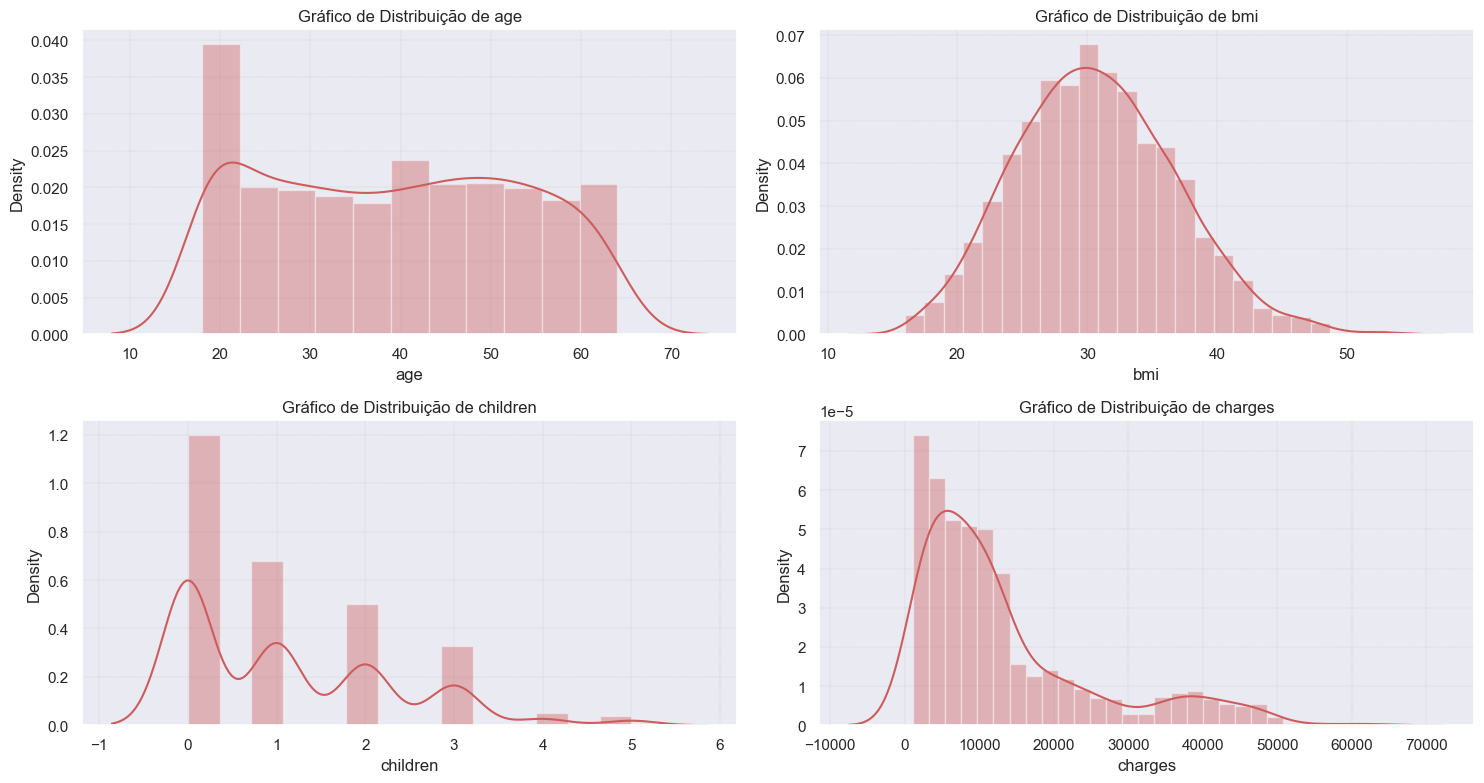

In [8]:
# Informando quais serão as variáveis que serão plotadas em gráfico
variaveis = ['age','bmi','children','charges']

# Determinado a quantidade de linhas, colunas e o tamanho da figura
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (15,8))
axs = axs.flatten()

# Criando um condicional para plotar os 4 gráficos
for i,variavel in enumerate(variaveis):
    sns.distplot(df[variavel], kde = True, ax = axs[i], color= 'indianred')
    axs[i].grid(color='gray', linestyle='--', linewidth=0.1)
    axs[i].set_title(f"Gráfico de Distribuição de {variavel}")

fig.tight_layout()
plt.show()

Aqui observamos a distribuições de nossas variáveis. A variável idade tem uma maior frequência de jovens entre 18 e 23 anos, o IMC (BMI) segue uma distribuição normal com média próxima a 30, temos uma maior frequência de pessoas com 0 filhos, o custo segue uma distribuição com cauda longa parecida com a poisson, ou seja, temos valores entre 20000 e 50000 pouco frequente.

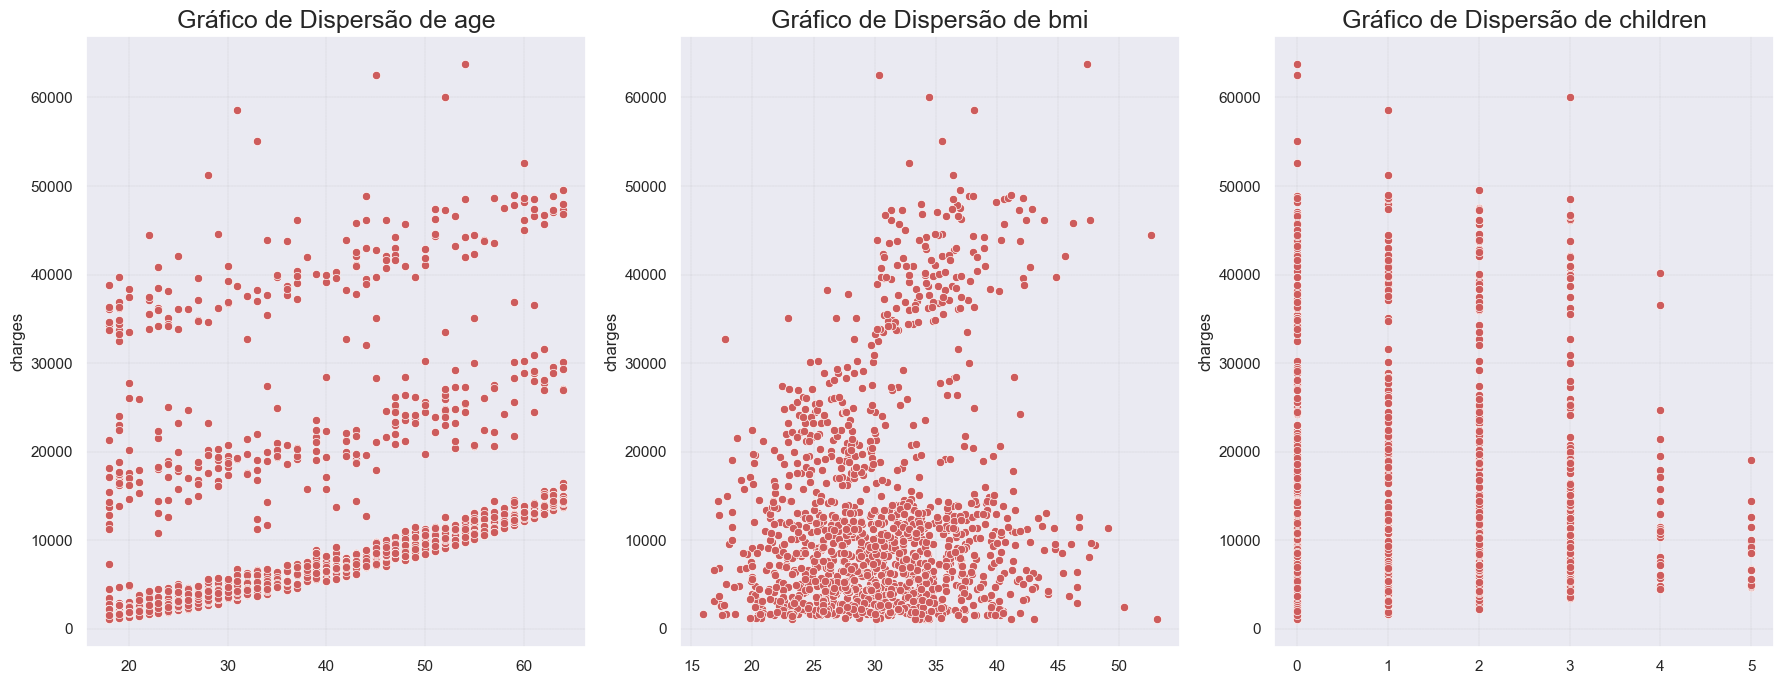

In [9]:
# Informando quais serão as variáveis que serão plotadas em gráfico
variaveis = ['age','bmi','children']

# Determinado a quantidade de linhas, colunas e o tamanho da figura
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (18,7))
axs = axs.flatten()

# Criando um condicional para plotar os 4 gráficos
for i,variavel in enumerate(variaveis):
    sns.scatterplot(data = df, y = 'charges',x = variavel, ax = axs[i], color = 'indianred')
    axs[i].grid(color='gray', linestyle='--', linewidth=0.1)
    axs[i].set_xlabel('')
    axs[i].set_title(f"Gráfico de Dispersão de {variavel}", fontsize = 18)

fig.tight_layout()
plt.show()

A fim de observar a relação das nossas variáveis através dos gráficos de dispersão de acordo com o custo, repara-se que não existe uma correlação muito forte com a nossa variável resposta

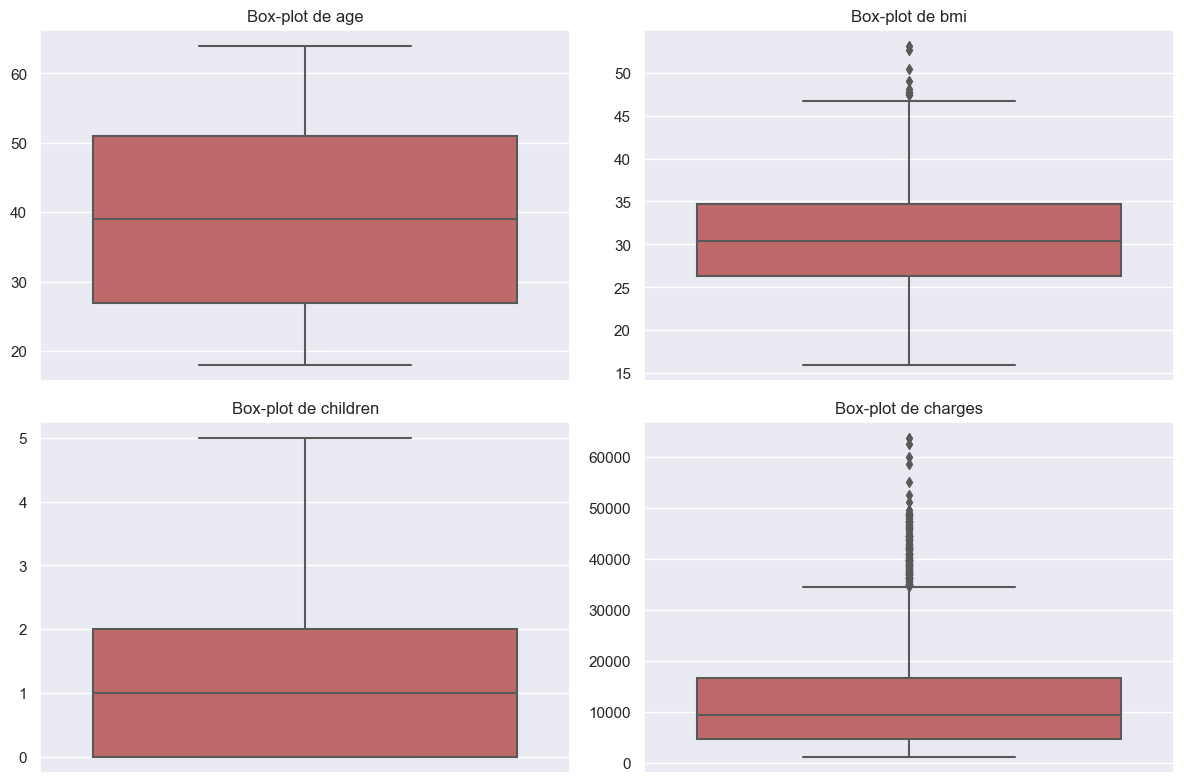

In [10]:
# Informando quais serão as variáveis que serão plotadas em gráfico
variaveis = ['age','bmi','children','charges']

# Determinado a quantidade de linhas, colunas e o tamanho da figura
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8))
axs = axs.flatten()

# Criando um condicional para plotar os 4 gráficos
for i,variavel in enumerate(variaveis):
    sns.boxplot(data = df,y= variavel, ax = axs[i], color = 'indianred')
    axs[i].set_title(f"Box-plot de {variavel}")
    axs[i].set_ylabel("")

fig.tight_layout()
plt.show()

#### Teste de Hipótese 1

Durante a análise exploratória surgiu uma questão, será que há uma diferença de custo dependendo do IMC da pessoa?

Para isso, será feita algumas visualizações e após será feito o teste

Primeiramente, faremos uma copia do nosso DataFrame com o objetivo de não alterar nossa base de dados original

In [11]:
# Fazendo uma copia do data frame
df_copia = df.copy()

Criaremos uma nova coluna "Status BMI", dentro desta coluna, teremos as seguintes categorias:
- Abaixo do peso: Se o IMC estiver menor do que 18.5
- Ideal: Se o IMC estiver entre 18.5 e 24.9
- Acima do peso: Se o IMC estiver entre 25 e 29.9
- Obeso: Se o IMC estiver maior que 29.9

O objetivo é analisar como nossos dados se comportam de acordo com estas categorias, a fim de aprofundar a análise sobre o IMC

In [12]:
# Criando uma nova coluna com nome "Status BMI"
df_copia['Status BMI'] = np.nan
lista = [df_copia]

# Fazendo um loop for para determinar as categorias
for coluna in lista:
    coluna.loc[(coluna['bmi'] <= 18.5), 'Status BMI'] = 'Abaixo do peso'
    coluna.loc[(coluna['bmi'] > 18.5) & (coluna['bmi'] <= 24.9), 'Status BMI'] = 'Ideal'
    coluna.loc[(coluna['bmi'] > 25) & (coluna['bmi'] <= 29.9), 'Status BMI'] = 'Acima do peso'
    coluna.loc[coluna['bmi'] > 29.9, 'Status BMI'] = 'Obeso'
    
    
labels = df_copia["Status BMI"].unique().tolist()
amount = df_copia["Status BMI"].value_counts().tolist()
df_copia

,age,sex,bmi,children,smoker,region,charges,Status BMI
0,19,female,27.900,0,yes,southwest,16884.92400,Acima do peso
1,18,male,33.770,1,no,southeast,1725.55230,Obeso
2,28,male,33.000,3,no,southeast,4449.46200,Obeso
3,33,male,22.705,0,no,northwest,21984.47061,Ideal
4,32,male,28.880,0,no,northwest,3866.85520,Acima do peso
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obeso
1334,18,female,31.920,0,no,northeast,2205.98080,Obeso
1335,18,female,36.850,0,no,southeast,1629.83350,Obeso
1336,21,female,25.800,0,no,southwest,2007.94500,Acima do peso


Neste momento, observaremos a média de custo de cada categoria

In [13]:
# Verificando a média de custo por categoria
df_copia.groupby('Status BMI')['charges'].mean()

Status BMI
Abaixo do peso     8657.620652
Acima do peso     10996.429632
Ideal             10404.900084
Obeso             15510.915636
Name: charges, dtype: float64

Para melhorar a visualização, serão plotados quatro gráficos distintos: Gráfico de barras, Gráfico de pizza, Gráfico de dispersão e Gráfico de barras na forma horizontal.

In [1]:
# Determinando o tamanho da figura
plt.figure(figsize = (15,15))

# Criando os valores
counts = df_copia['Status BMI'].value_counts()

# Criando o gráfico de barra
plt.subplot(2,2,1)
sns.barplot(x = (df_copia.groupby('Status BMI')['charges'].mean()).index, y = df_copia.groupby('Status BMI')['charges'].mean(), palette= 'Paired');
plt.title("Gráfico de barras de Charges por Status BMI", fontsize = 16)
plt.xlabel("")
plt.ylabel("")

# Criando o gráfico de pizza
plt.subplot(2,2,2)
plt.pie(counts, colors=cores, startangle=180,shadow = True,autopct= '%.0001f%%',explode = (0, 0, 0.25, 0))
plt.legend(counts.index,fontsize = 9, shadow= True)
plt.title("Gráfico de Pizza do Status BMI", fontsize = 16)

# Criando o gráfico de dispersão
plt.subplot(2,2,3)
sns.scatterplot(data=df_copia, x='age', y='charges', hue='Status BMI', palette='Set1')
plt.title("Gráfico de Dispersão da Idade por Status BMI", fontsize = 16)
plt.legend(loc='upper left')
plt.xlabel("")
plt.ylabel("")

# Criando o gráfico de barras na horizontal
plt.subplot(2,2,4)
sns.barplot(data = df_copia,y = 'Status BMI',x = 'charges',hue = df_copia['smoker'], palette= 'Paired')
plt.title("Gráfico de Dispersão na Horizontal",fontsize=16)
plt.ylabel("");


NameError: name 'plt' is not defined

Analisando os quatros gráficos, iniciando pelo gráfico de barras, podemos ver que a média de custos sobe de acordo com o IMC da pessoa, ou seja, quanto maior o IMC, maior o seu custo médico, sendo os obesos com maior custo.

A partir do gráfico de pizza, podemos ver que os clientes Obeso são a maiorias, sendo mais da metade da nossa base de dados.

O gráfico de dispersão mostra que a idade impacta no custo, porém o IMC é um grande impactante, deviso que os maiores IMC são daqueles que são obesos, porém na parte debaixo no nosso gráfico, também tem obesos que não tem um custo tão alto, este fato ocorre devido que há outra variável influenciando tanto quanto o IMC. A veremos no próximo gráfico

Observando o gráfico de barras horizontal, será verificada a influencia da variável "Fumante" no conjunto de dados. É possível verificar que a variável fumante impacta no nosso custo, talvez até mais do que o IMC. Isso que verificaremos posteriormente
 


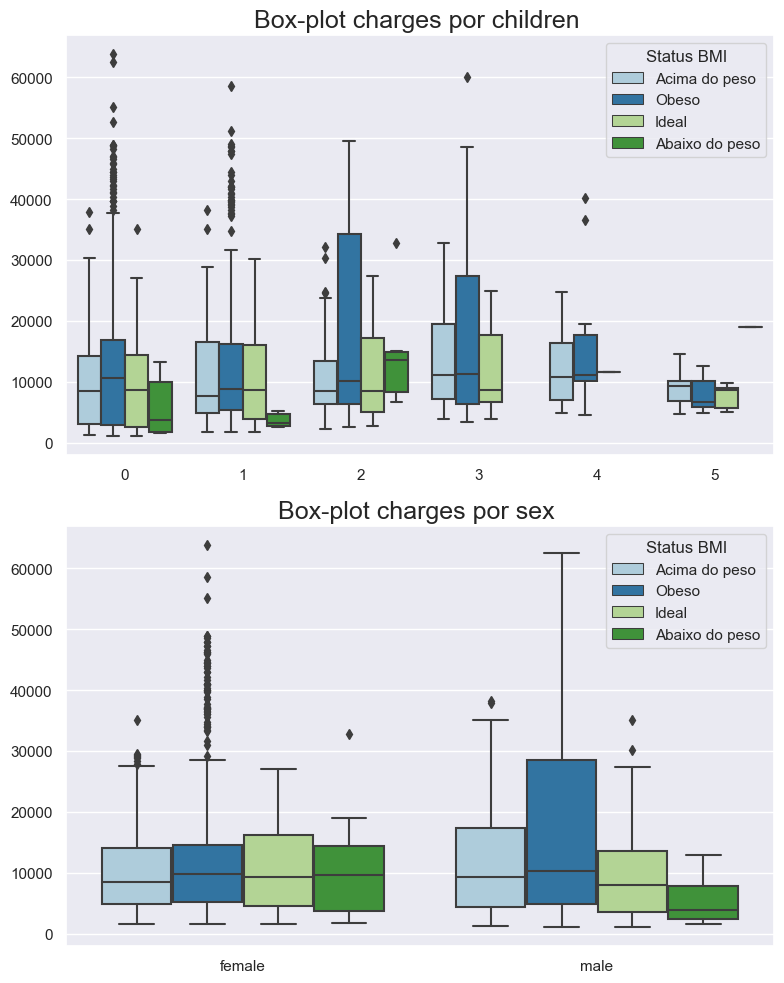

In [15]:
# Determinando as váriaveis do gráfico
variaveis = ['children', 'sex']

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8,10))
axs = axs.flatten()

# Criando um loop for para plotar os dois gráficos
for i, variavel in enumerate(variaveis):
    sns.boxplot(data=df_copia, x=variavel, y='charges', hue='Status BMI', ax=axs[i],palette= "Paired")
    axs[i].set_title(f"Box-plot charges por {variavel} ", fontsize = 18)
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")

fig.tight_layout()
plt.show()

O boxplot  de charges por dependentes também mostra que obesos possuem os maiores custos e outliers, aqueles que não possuem filhos são os com maiores custos, devido a sua média maior e maior frequencia de dados além do maximo do box plot. Algo curioso, pois o custo deveria aumentar de acordo com a quantidade de dependentes. O mesmo ocorre com o boxplot do charges por sexo, observa-se que quando a pessoa é acima do peso ou obesa, o custo dela aumenta independente do seu gênero .

Agora, será feito o teste das hipóteses com o objetivo de descobrir se há diferença estatistica entre estes grupos

Para verificarmos se há uma diferença estatística, faremos um teste de hipótese a fim de determinar:

- H0: Há diferença estatística
- H1: Não há diferença estatística

Para isso, precisaremos do Valor da Estatística F e do P Valor

In [16]:
# Importando a biblioteca
from scipy.stats import f_oneway

# Verificando a estatistica e o p valor 
estatistica,p_valor = f_oneway(
    df_copia[df_copia['Status BMI'] == 'Abaixo do peso']['charges'],
    df_copia[df_copia['Status BMI'] == 'Acima do peso']['charges'],
    df_copia[df_copia['Status BMI'] == 'Ideal']['charges'],
    df_copia[df_copia['Status BMI'] == 'Obeso']['charges']
)

# Escrevendo os valores
print(f"O valor da Estatística F é {estatistica}")
print(f"O valor do P-Valor é {p_valor}")

O valor da Estatística F é 18.34665705429296
O valor do P-Valor é 1.1498487891342883e-11


Após descobrir ambos, será feito o teste com 99% de confiança

In [17]:
# Determinando o nível de significância
nivel_significancia = 0.01

# Gerando um condicional if
if p_valor < nivel_significancia:
    print("Há diferença significativa nas médias de preços entre os grupos de BMI.")
else:
    print("Não há diferença significativa nas médias de preços entre os grupos de BMI.")

Há diferença significativa nas médias de preços entre os grupos de BMI.


Portanto, conclui-se que há diferença entre os grupos, ou seja, quanto maior o BMI, maior o custo.

Após o primeiro teste de hipóteses, analisaremos as variáveis qualitativas, como: "Sexo","Fumante","Região" e "Dependentes"

Para isso, faremos gráficos de rosca para as três variáveis para analisarmos como estão distribuidas

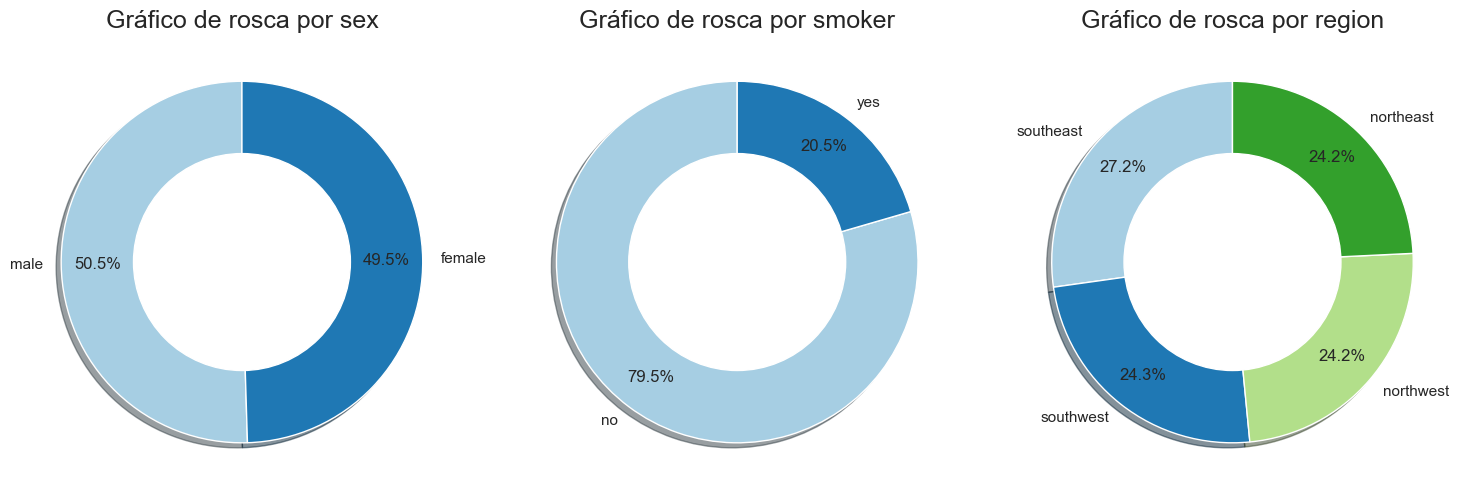

In [18]:
# Informando quais serão as variáveis que serão plotadas em gráfico
variaveis = ['sex', 'smoker', 'region']

# Determinado a quantidade de linhas, colunas e o tamanho da figura
fig, axs = plt.subplots(nrows=1, ncols=len(variaveis), figsize=(15, 8))

# Criando um condicional para plotar os 4 gráficos
for i, variavel in enumerate(variaveis):
    counts = df_copia[variavel].value_counts()
    axs[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors = cores, shadow = True, pctdistance=0.8)
    axs[i].set_title(f"Gráfico de rosca por {variavel}", fontsize = 18)
    centre_circle = plt.Circle((0, 0), 0.6, fc='white')
    axs[i].add_artist(centre_circle)
    
    
fig.tight_layout()
plt.show()

Analisando os gráficos, verifica-se que nossos dados estão proporcionalmente distribuídos entre região e sexo, porém não estão proporcional para os Fumantes cuja proporção é 1/4 para os fumantes.

Neste momento, surge a dúvida de como estão distribuídas essas de acordo com a média de custo

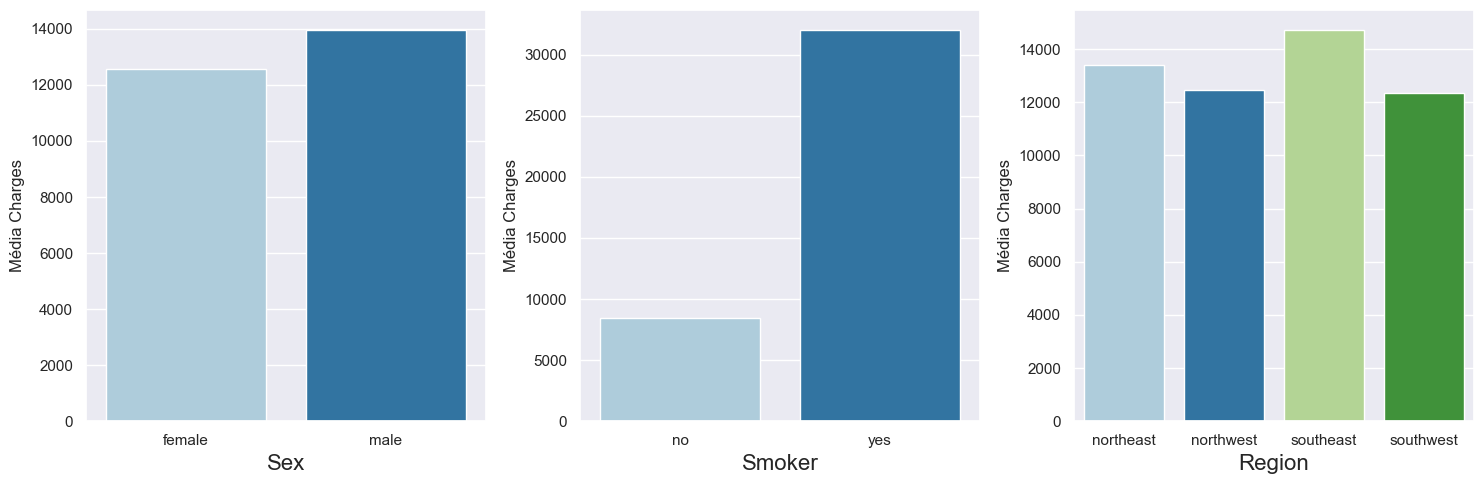

In [19]:
# Informando quais serão as variáveis que serão plotadas em gráfico
variaveis = ['sex','smoker','region']

# Determinado a quantidade de linhas, colunas e o tamanho da figura
fig, axs = plt.subplots(nrows=1, ncols=len(variaveis), figsize=(15, 5))

# Criando um condicional para plotar os 4 gráficos
for i, variavel in enumerate(variaveis):
    counts = df_copia.groupby([variavel])['charges'].mean()
    sns.barplot(x=counts.index, y=counts, ax=axs[i], palette= "Paired")
    axs[i].set_xlabel(variavel.capitalize(), fontsize = 16)
    axs[i].set_ylabel('Média Charges')

fig.tight_layout()
plt.show()

Curiosamente, vemos novamente uma desigualdade entre os fumantes e não-fumantes, os fumantes tem em média um custo um pouco mais de três vezes maior

Portanto, aprofundaremos um pouco nesta variável e veremos como ela se comporta com relação as outras

Para isso, verificaremos se ela está relacionada com outras variáveis que vimos que impactam, como "Idade" e "IMC"

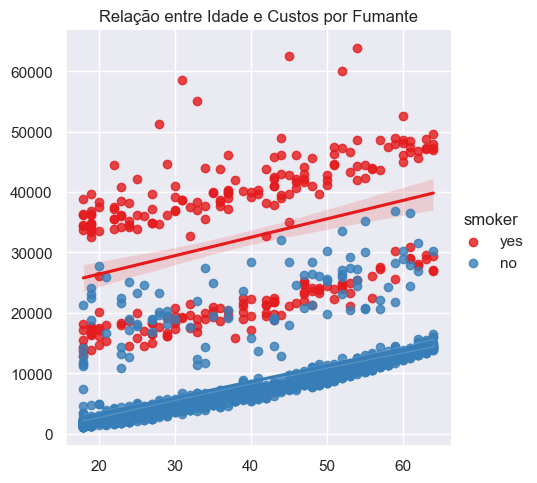

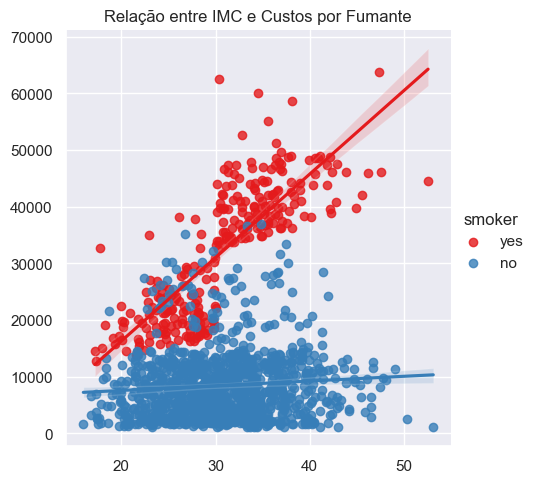

In [20]:
# Criando dois gráficos de dispersão com uma reta
sns.lmplot(data=df_copia,x="age", y="charges", hue="smoker", palette='Set1').set_axis_labels("", "")
plt.title("Relação entre Idade e Custos por Fumante")
sns.lmplot(data=df_copia,x="bmi", y="charges", hue="smoker", palette='Set1').set_axis_labels("", "")
plt.title("Relação entre IMC e Custos por Fumante");

Visualizando os dois gráficos de dispersão podemos ver como as retas de cada cor se comportam, sendo a reta pertencente aos fumantes sempre maior que a dos não fumante.

No primeiro gráfico, a faixa de custo mais baixa é toda azul ou dos não fumantes e a faixa de custo mais alta é toda vermelha ou dos fumantes. Porém, a faixa de custo intermediária, contém ambos. Portanto, chega-se a conclusão que outra variável está afetando e acredita que possa ser o IMC.

Pois no segundo gráfico, vemos uma a correlação linear dos fumantes quanto maior seu IMC maior o seu custo

Afinal, como estão distribuídos de acordo com a variável "Fumante"?

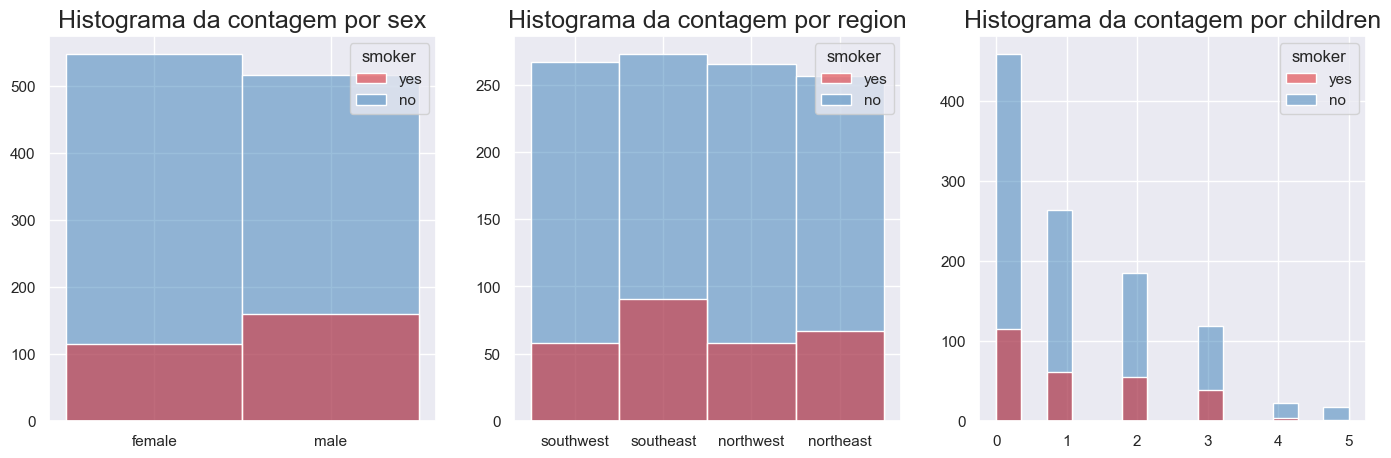

In [21]:
# Determinando as váriaveis desejadas para criar o gráfico
variaveis = ['sex','region','children']

# Determinando as linhas e colunas
fig, axs = plt.subplots(nrows=1, ncols=len(variaveis), figsize=(17, 5))

# Criando um loop for para criar os gráficos
for i, variavel in enumerate(variaveis):
    sns.histplot(x=df_copia[variavel],hue = 'smoker', data=df_copia, ax=axs[i],palette='Set1')
    axs[i].set_title(f"Histograma da contagem por {variavel}", fontsize = 18)
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")

Podemos ver que homens, pessoas do Sudeste ou sem filhos são mais fumantes

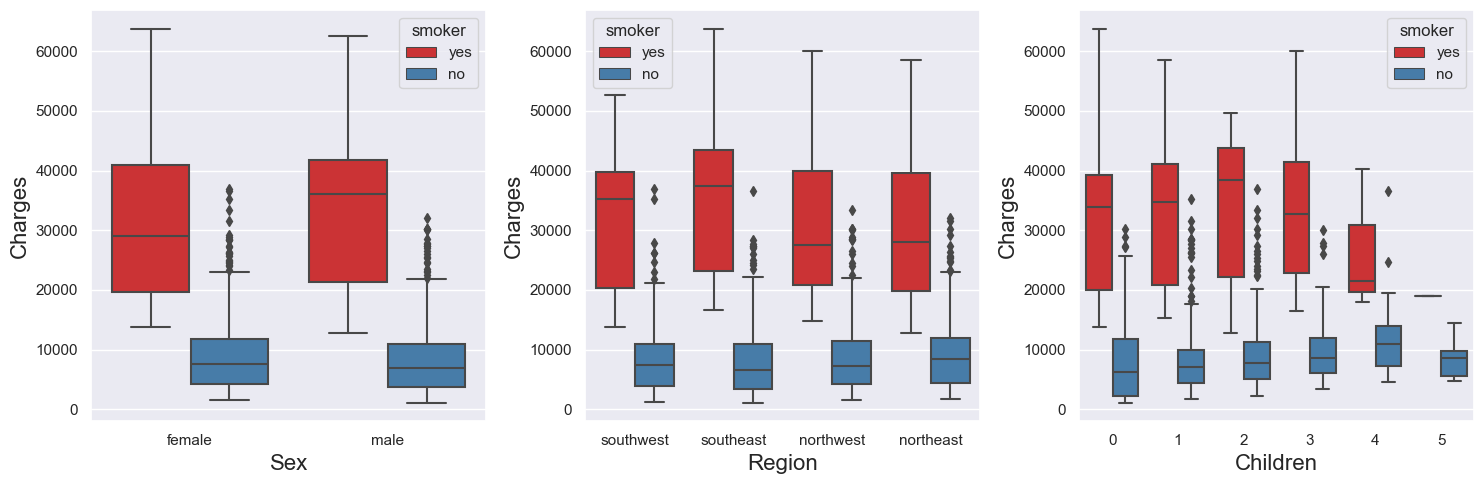

In [22]:
# Determinando as váriaveis desejadas para criar o gráfico
variaveis = [ 'sex','region','children']

# Determinando as linhas e colunas
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axs = axs.flatten()

# Criando um loop for para criar os gráficos
for i, variavel in enumerate(variaveis):
    sns.boxplot(data=df_copia, x=variavel, y='charges', hue='smoker', ax=axs[i], palette =    'Set1')
    axs[i].set_xlabel(variavel.capitalize(), fontsize=16)
    axs[i].set_ylabel("Charges", fontsize=16)
                      
fig.tight_layout()
plt.show()

Plotando os box-plots, estes apenas confirmam o que ja haviamos visto sobre a diferença entre os fumantes e não-fumantes

Será que há diferença de custo entre homem e mulher? Entre regiao? E entre dependentes?

#### Teste de hipótese 2

Neste momento, faremos 3 testes para verificar se há diferenças estatísticas entre os grupos de cada váriavel

- H0: O custo para homem é igual para mulher
- H0: O custo para homem não é igual para mulher

In [23]:
# Verificando a estatistica e o p valor 
estatistica,p_valor = f_oneway(
    df_copia[df_copia['sex'] == 'female']['charges'],
    df_copia[df_copia['sex'] == 'male']['charges']
)

# Escrevendo os valores
print(f"O valor da Estatística F é {estatistica}")
print(f"O valor do P-Valor é {p_valor}")

O valor da Estatística F é 4.513038425520686
O valor do P-Valor é 0.033820791995078286


In [24]:
# Determinando o nível de significância
nivel_significancia = 0.01

# Criando um condicional if
if p_valor < nivel_significancia:
    print("Há diferença significativa nas médias de preços entre os grupos mulheres e homens com 99% de confiança")
else:
    print("Não há diferença significativa nas médias de preços entre os grupos de mulheres e homens com 99% de confiança")

Não há diferença significativa nas médias de preços entre os grupos de mulheres e homens com 99% de confiança


In [25]:
# Verificando a estatistica e o p valor 
estatistica,p_valor = f_oneway(
    df_copia[df_copia['region'] == 'southeast']['charges'],
    df_copia[df_copia['region'] == 'northeast']['charges'],
    df_copia[df_copia['region'] == 'southwest']['charges'],
    df_copia[df_copia['region'] == 'northwest']['charges']
)

# Escrevendo os valores
print(f"O valor da Estatística F é {estatistica}")
print(f"O valor do P-Valor é {p_valor}")

O valor da Estatística F é 2.926139903662777
O valor do P-Valor é 0.03276288025444947


In [26]:
# Determinando o nível de significância
nivel_significancia = 0.01

# Criando um condicional if
if p_valor < nivel_significancia:
    print("Há diferença significativa nas médias de preços entre os grupos de regiões com 99% de confiança")
else:
    print("Não há diferença significativa nas médias de preços entre os grupos de regiões com 99% de confiança")

Não há diferença significativa nas médias de preços entre os grupos de regiões com 99% de confiança


In [27]:
# Verificando a estatistica e o p valor 
estatistica,p_valor = f_oneway(
    df_copia[df_copia['children'] == 0]['charges'],
    df_copia[df_copia['children'] == 1]['charges'],
    df_copia[df_copia['children'] == 2]['charges'],
    df_copia[df_copia['children'] == 3]['charges'],
    df_copia[df_copia['children'] == 4]['charges'],
    df_copia[df_copia['children'] == 5]['charges']
)

# Escrevendo os valores
print(f"O valor da Estatística F é {estatistica}")
print(f"O valor do P-Valor é {p_valor}")

O valor da Estatística F é 3.2687344101195737
O valor do P-Valor é 0.006133448188169501


In [28]:
# Determinando o nível de significância
nivel_significancia = 0.01

# Criando um condicional if
if p_valor < nivel_significancia:
    print("Há diferença significativa nas médias de preços entre os grupos de dependentes com 99% de confiança")
else:
    print("Não há diferença significativa nas médias de preços entre os grupos de dependentes com 99% de confiança")

Há diferença significativa nas médias de preços entre os grupos de dependentes com 99% de confiança


Ou seja, ao final, chegamos a conclusão que apenas a quantidade de dependentes que há diferença estatistica no custo, o restante não há diferença

Agora, a variável "Idade" será analisada. Para começar, criaremos uma nova coluna com o nome "Categoria_Idade", sendo as categorias: 

- Entre 18 e 35: Adulto Jovem
- Entre 35 e 60: Meia Idade
- Maior de 60: Idoso

In [29]:
# Criando uma nova coluna com nome "Categoria Idade"
df_copia['Categoria_Idade'] = np.nan
lista = [df_copia]

# Formando um loop for para determinar as categorias
for coluna in lista:
    coluna.loc[(coluna['age'] >= 18) & (coluna['age'] < 35), 'Categoria_Idade'] = 'Adulto Jovem'
    coluna.loc[(coluna['age'] >= 35) & (coluna['age'] <= 60), 'Categoria_Idade'] = 'Meia idade'
    coluna.loc[(coluna['age'] >= 60), 'Categoria_Idade'] = 'Idoso'
    
    
labels = df_copia["Categoria_Idade"].unique().tolist()
amount = df_copia["Categoria_Idade"].value_counts().tolist()
df_copia

,age,sex,bmi,children,smoker,region,charges,Status BMI,Categoria_Idade
0,19,female,27.900,0,yes,southwest,16884.92400,Acima do peso,Adulto Jovem
1,18,male,33.770,1,no,southeast,1725.55230,Obeso,Adulto Jovem
2,28,male,33.000,3,no,southeast,4449.46200,Obeso,Adulto Jovem
3,33,male,22.705,0,no,northwest,21984.47061,Ideal,Adulto Jovem
4,32,male,28.880,0,no,northwest,3866.85520,Acima do peso,Adulto Jovem
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obeso,Meia idade
1334,18,female,31.920,0,no,northeast,2205.98080,Obeso,Adulto Jovem
1335,18,female,36.850,0,no,southeast,1629.83350,Obeso,Adulto Jovem
1336,21,female,25.800,0,no,southwest,2007.94500,Acima do peso,Adulto Jovem


Após criarmos esta coluna, verificaremos a quantidade de valores por categoria

In [30]:
# Verificando a quantidade de registros por categoria
cat_idade = df_copia['Categoria_Idade'].value_counts();cat_idade

Meia idade      675
Adulto Jovem    548
Idoso           114
Name: Categoria_Idade, dtype: int64

Para facilitar a visualização faremos alguns gráficos

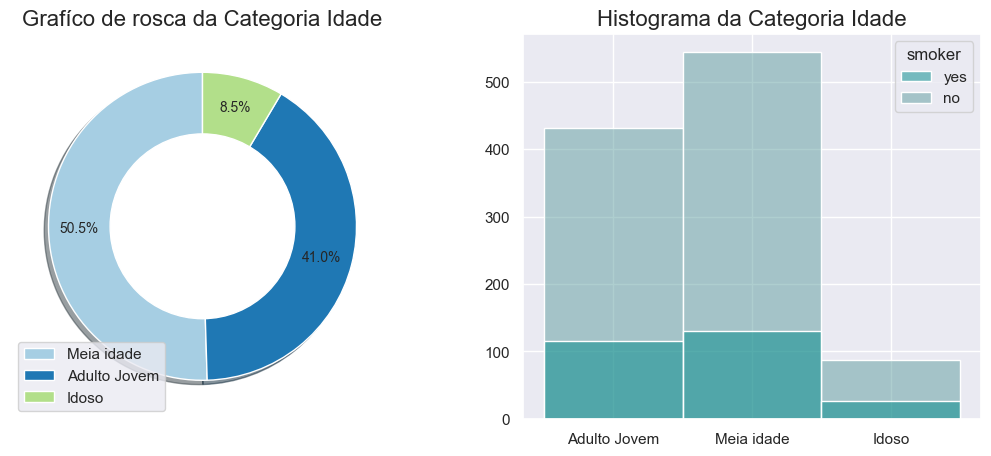

In [31]:
# Determinando o tamanho da figura
plt.figure(figsize=(13,5))

# Gerando o gráfico de rosca
plt.subplot(1,2,1)
plt.pie(cat_idade, autopct='%1.1f%%', startangle=90, colors = cores, shadow = True, pctdistance=0.80, textprops={'fontsize': 10})
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
plt.legend(cat_idade.index, loc='lower left')
plt.title("Grafíco de rosca da Categoria Idade", fontsize = 16)
plt.gca().add_artist(centre_circle);

# Gerando o histograma
plt.subplot(1,2,2)
sns.histplot(x='Categoria_Idade',hue = 'smoker', data=df_copia, palette = ['darkcyan','cadetblue'])
plt.title("Histograma da Categoria Idade", fontsize = 16)
plt.xlabel("")
plt.ylabel("");

Podemos visualizar que a categoria "Meia Idade" contém a maior frequência, sendo 50.5% do nosso conjunto de dados. A categoria com menor frequência é a "Idoso". Podemos verificar que a porcentagem de fumantes entre os Adulto Jovens é maior.

In [32]:
contagem_por_categoria_idade = df_copia.groupby('Categoria_Idade')['smoker'].value_counts()
contagem_por_categoria_idade

Categoria_Idade  smoker
Adulto Jovem     no        432
                 yes       116
Idoso            no         87
                 yes        27
Meia idade       no        544
                 yes       131
Name: smoker, dtype: int64

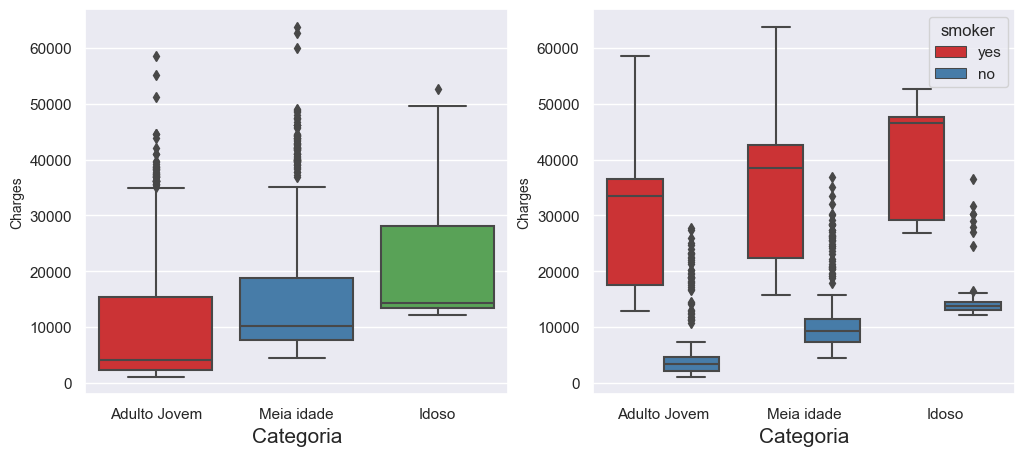

In [33]:
# Determinando o tamanho da figura
plt.figure(figsize = (12,5))

# Gerando o boxplot 
plt.subplot(1,2,1)
sns.boxplot(data=df_copia, x='Categoria_Idade', y='charges', palette = 'Set1')
plt.xlabel("Categoria", fontsize = 15)
plt.ylabel("Charges", fontsize = 10)

# Gerando o boxplot com a variável fumante
plt.subplot(1,2,2)
sns.boxplot(data=df_copia, x='Categoria_Idade', y='charges',hue = 'smoker', palette = 'Set1')
plt.xlabel("Categoria", fontsize = 15)
plt.ylabel("Charges", fontsize = 10);

Podemos ver que o valor de acordo com a idade aumenta, porém na categoria Adulto e Meia Idade há mais outliers devido ao impacto de outras variáveis

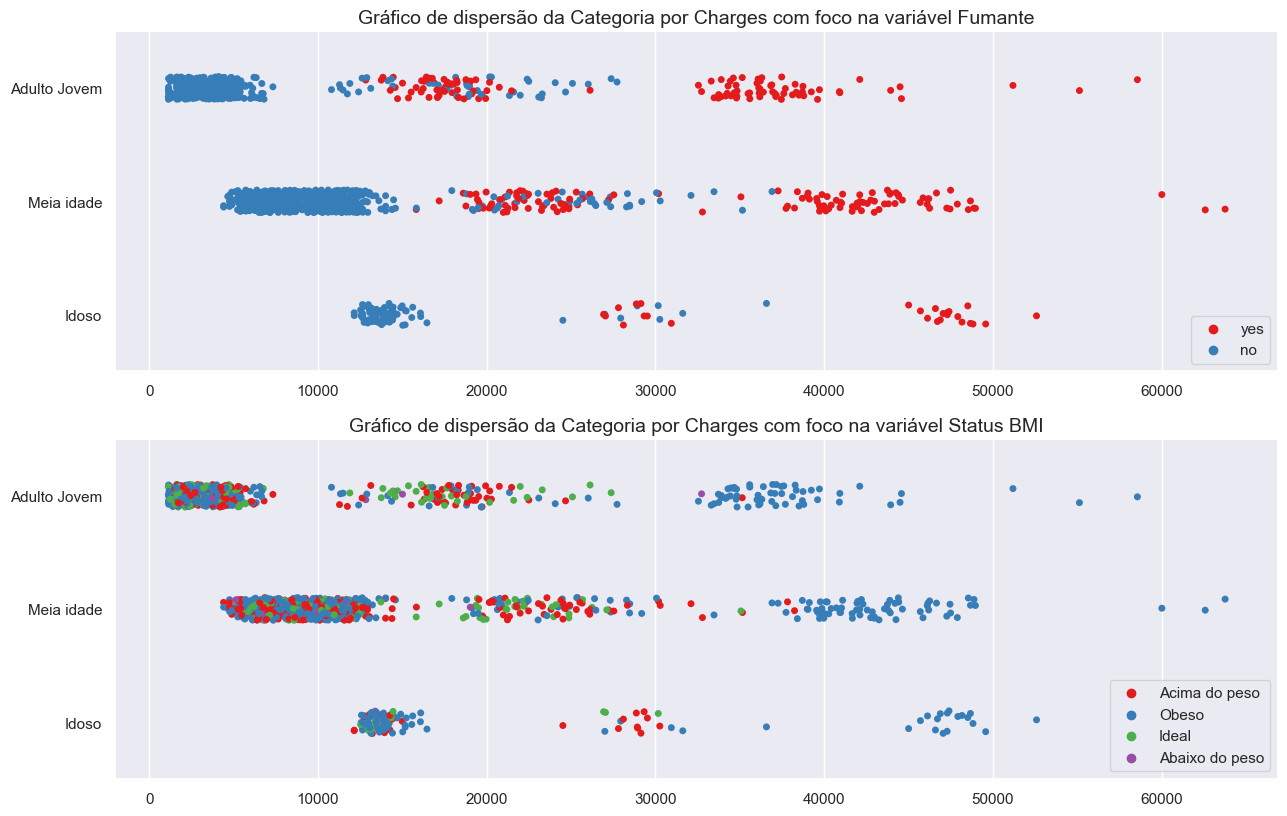

In [34]:
# Determinando o tamanho da figura
plt.figure(figsize = (15,15))

# Criando o primeiro gráfico de dispersão
plt.subplot(3,1,1)
sns.stripplot(data=df_copia,y="Categoria_Idade", x="charges", hue="smoker", palette='Set1')
plt.xlabel("")
plt.ylabel("")
plt.legend(loc = 'lower right')
plt.title("Gráfico de dispersão da Categoria por Charges com foco na variável Fumante", fontsize = 14)

# Criando o segundo gráfico de dispersão
plt.subplot(3,1,2)
sns.stripplot(data=df_copia,y="Categoria_Idade", x="charges", hue="Status BMI", palette='Set1')
plt.xlabel("")
plt.ylabel("")
plt.legend(loc = 'lower right')
plt.title("Gráfico de dispersão da Categoria por Charges com foco na variável Status BMI", fontsize = 14);


No primeiro gráfico, podemos ver um pouco melhor a linearidade do custo em relação ao custo. Analisando os gráficos em conjunto, verificamos que os maiores são de obesos, fumantes e idoso, porém não possuímos dados da categoria Idoso suficientes, o que torna menos precisa nossa análise

In [35]:
# Criando um data frame com a média de custo de acordo com as categorias em ordem decrescente
Comparação = pd.DataFrame(df_copia.groupby(['smoker', 'Status BMI', 'Categoria_Idade'])['charges'].median().reset_index())
Comparação.sort_values(by='charges',ascending=False)

,smoker,Status BMI,Categoria_Idade,charges
21,yes,Obeso,Idoso,47298.180000
22,yes,Obeso,Meia idade,42257.415175
20,yes,Obeso,Adulto Jovem,36397.576000
15,yes,Acima do peso,Idoso,28950.469200
18,yes,Ideal,Idoso,26982.214250
16,yes,Acima do peso,Meia idade,23568.272000
19,yes,Ideal,Meia idade,21259.377950
13,yes,Abaixo do peso,Meia idade,19023.260000
14,yes,Acima do peso,Adulto Jovem,18234.973350
17,yes,Ideal,Adulto Jovem,16577.779500


Com este DataFrame podemos visualizar melhor as maiores medianas dos custos, confirmando o que foi dito anteriormente

## Transformando qualitativas em quantitativas

Neste instante, começaremos os preparativos para gerar nossos modelos preditivos, transformando as variáveis qualitativas em qualitativas

In [36]:
# Verificando o dataframe original
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [37]:
# Importando as bibliotecas
from sklearn import preprocessing

# Construindo um loop for para mudar as varíaveis de qualitativas para quantitativas
for coluna in df.select_dtypes(include = ['object']).columns:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df[coluna].unique())
    df[coluna] = label_encoxder.transform(df[coluna])
    
    print(f"{coluna}: {df[coluna].unique()}")

sex: [0 1]
smoker: [1 0]
region: [3 2 1 0]


In [38]:
# Revendo o dataframe
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


Aqui podemos visualizar que as categorias deixaram de ser palavras e se tornaram números

<Axes: >

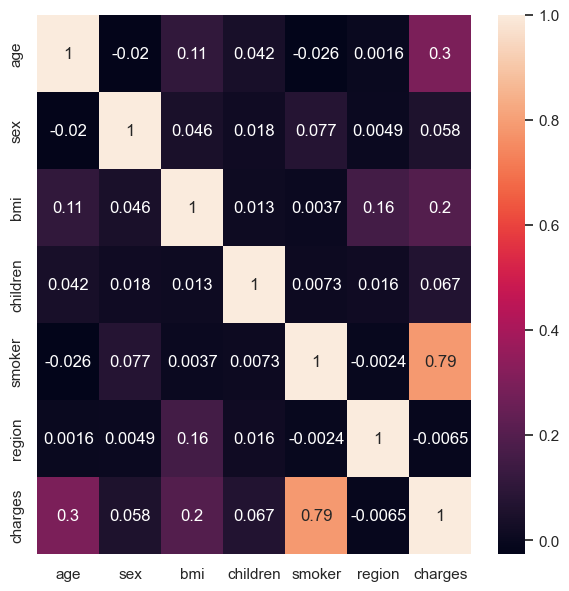

In [39]:
# Determinando o tamanho da figura
plt.figure(figsize = (7,7))

# Verificando a correlação
sns.heatmap(df.corr(), annot = True)

Aqui está a correlação de nossas váriaveis, sendo a que mais impacta "Fumante" e posteriormente "Idade" e "IMC"

## Separando Variáveis

Para criar o modelo, precisamos de 2 base de dados, os nossos previsores e a nossa variável desejável. Para isso, será separada a variável "Custo" em y e as demais variáveis

In [40]:
# Salvando as variáveis em "x", exceto a variável "Charges"
x = df.drop(['charges'], axis = 1)

# Salvando a variável "Charges" em "y"
y = df.charges

In [41]:
# Observando "x" e "y"
x,y

(      age  sex     bmi  children  smoker  region
 0      19    0  27.900         0       1       3
 1      18    1  33.770         1       0       2
 2      28    1  33.000         3       0       2
 3      33    1  22.705         0       0       1
 4      32    1  28.880         0       0       1
 ...   ...  ...     ...       ...     ...     ...
 1333   50    1  30.970         3       0       1
 1334   18    0  31.920         0       0       0
 1335   18    0  36.850         0       0       2
 1336   21    0  25.800         0       0       3
 1337   61    0  29.070         0       1       1
 
 [1337 rows x 6 columns],
 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 1337    29141.36030
 Name: charges, Length: 1337, dtype: float64)

In [42]:
# Checando a quantidade de linhas e colunas de "x"
x.shape

(1337, 6)

In [43]:
# Checando a quantidade de linhas e colunas de "y"
y.shape

(1337,)

Então, serão 1337 dados com 6 variáveis em x e 1337 dados com uma variável em y

## Separando os dados de treino e de teste

Para realizar os nossos modelos, estas base de dados serão divididas em treino e teste sendo 80% para treino e 20% para teste

In [44]:
# Importando a biblioteca
from sklearn.model_selection import train_test_split

# Separando "x" e "y" em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size= 0.2, random_state = 3)

In [45]:
# Checando a quantidade de linhas e colunas de "x_treino" e "x_teste"
x_treino.shape, x_teste.shape

((1069, 6), (268, 6))

In [46]:
# Checando a quantidade de linhas e colunas de "y_treino" e "y_teste"
y_treino.shape, y_teste.shape

((1069,), (268,))

Portanto, serão 1069 dados para treino e 268 para teste

## Padronizando os dados com Stander Scaler


Alguns modelos como "SVM" e "Redes Neurais" necessitam que os dados estejam padronizados em escala igual, devido a isso, faremos a padronização para estes modelos

In [47]:
# Importando o módulo
from sklearn.preprocessing import StandardScaler

# Padronizando os dados de treino
x_scaler = StandardScaler()
x_treino_scaler = x_scaler.fit_transform(x_treino)
y_scaler = StandardScaler()
y_treino_scaler = y_scaler.fit_transform(y_treino.values.reshape(-1,1))
x_teste_scaler = x_scaler.transform(x_teste)
y_teste_scaler = y_scaler.transform(y_teste.values.reshape(-1,1))

# Treinamento dos modelos preditivos

Após, faremos o treinamento dos modelos preditivos. Inicialmente, verificaremos quais são os melhores parâmetros para utilizar em nossos modelos (exceto no modelo de Regressão Linear, pois não há parâmetros),  depois treinaremos o modelo com os parâmetros, por fim, os avaliaremos, verificando a R2, MAPE, RMSE e MAE

## Regressão Linear

In [48]:
# Importando o algoritmo da Regressão linear
from sklearn.linear_model import LinearRegression

# Treinando o modelo
regressão_linear = LinearRegression().fit(x_treino,y_treino)


In [49]:
# Checando suas previsoes com os dados de treino
previsoes_treino_regressão_linear = regressão_linear.predict(x_treino)
previsoes_treino_regressão_linear

array([24303.49846344, 13629.5628038 , 14157.92397099, ...,
       11244.78016816, 33409.30768074, 27146.48912497])

In [50]:
# Checando suas previsoes com os dados de teste
previsoes_teste_regressão_linear = regressão_linear.predict(x_teste)
previsoes_teste_regressão_linear

array([35102.48869601,  9032.45768574,  1546.22563007, 12459.55815704,
       34776.48179965, 26359.59381837, 35892.63350845, 15833.62940125,
       34011.51130255, 11421.13523819,  3802.48616359, 11865.91016894,
       12123.1507361 , 11785.201568  , 32210.78207427, 16313.74209375,
       12515.71904817,  2266.88298332, 16933.43186369, 16126.27127989,
       11505.42079844,  4514.10678829, 12443.85897401, 12303.64037889,
       23419.17299798, 36501.95892091,  5446.66383043, 27548.29256462,
        5175.09528318,  4014.43247268,   513.69541521, 35014.43601013,
       37524.6160971 , 11400.75877195,  1637.15688729, 26362.33420256,
        8183.71910239,  8111.02702213,  6050.46897011,  3692.23865128,
        3839.55971082, 15373.76761335, 14454.07741428, 14387.77535996,
        2475.45702698,  3130.5606094 , 10321.85393584,  8864.09132163,
        4820.76406988,  6463.41295844,  6587.01811182, 31789.87383609,
        2251.41362111,  9797.11297987, 27509.05718866,  5105.42368751,
      

In [51]:
# Verificando os valores reais
y_teste

856     40974.16490
778      5934.37980
65       1743.21400
624     12129.61415
1007    24915.22085
           ...     
173      5246.04700
1197     5699.83750
539     27346.04207
46       3393.35635
1105    10338.93160
Name: charges, Length: 268, dtype: float64

In [52]:
# Importando as métricas
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error

# Verificando o valor do r2 de treino e teste
r2_treino_regressão = r2_score(y_treino,previsoes_treino_regressão_linear)
r2_teste_regressão = r2_score(y_teste,previsoes_teste_regressão_linear)

# Verificando o valor do erro absoluto de treino e teste
erro_absoluto_treino_regressão = mean_absolute_error(y_treino,previsoes_treino_regressão_linear)
erro_absoluto_teste_regressão = mean_absolute_error(y_teste,previsoes_teste_regressão_linear)


erro_quadrado_treino_regressão = mean_squared_error(y_treino,previsoes_treino_regressão_linear)
erro_quadrado_teste_regressão = mean_squared_error(y_teste,previsoes_teste_regressão_linear)
percentual_erro_absoluto_treino_regressão = mean_absolute_percentage_error(y_treino,previsoes_treino_regressão_linear)
percentual_erro_absoluto_teste_regressão = mean_absolute_percentage_error(y_teste,previsoes_teste_regressão_linear)

print(f"R2 Treino: {r2_treino_regressão}")
print(f"R2 Teste: {r2_teste_regressão}")
print(f"MAE Treino: {erro_absoluto_treino_regressão}")
print(f"MAE Teste: {erro_absoluto_teste_regressão}")
print(f"RMSE Treino: {np.sqrt(erro_quadrado_treino_regressão)}")
print(f"RMSE Teste: {np.sqrt(erro_quadrado_teste_regressão)}")
print(f"MAPE Treino: {percentual_erro_absoluto_treino_regressão}")
print(f"MAPE Teste: {percentual_erro_absoluto_teste_regressão}")

R2 Treino: 0.7475884070303489
R2 Teste: 0.7606560137229366
MAE Treino: 4137.310113941355
MAE Teste: 4196.095943046913
RMSE Treino: 6075.090291470002
RMSE Teste: 5943.532272895656
MAPE Treino: 0.4204815345779864
MAPE Teste: 0.3980661440613093


## Regressão Polinomial

In [53]:
# Importando o algoritmo da Regressão Polinomial 
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()

# Importando o algoritmo para verificar os melhores hiperparâmetros
from sklearn.model_selection import GridSearchCV

# Dizendo quais os parâmetros para serem analisados
parametros_polinomial = {'degree': [1, 2, 3, 4, 5]}

# Verificando os melhores parametros
grid_polinomial = GridSearchCV(poly, parametros_polinomial, cv=5, scoring='neg_mean_squared_error')
grid_polinomial.fit(x_treino, y_treino)

# Vendo qual melhor parâmetro
melhores_parametros_polinomial = grid_polinomial.best_params_['degree']

# Dizendo ao algoritmo qual o melhor parâmetro
poly_melhor_degree = PolynomialFeatures(degree=melhores_parametros_polinomial)

# Transformando os dados com o melhor parâmetro
x_treino_poly = poly_melhor_degree.fit_transform(x_treino)

# Criando o modelo de regressão
regressao_polinomial_best = LinearRegression()

# Treinando o modelo
regressão_polinomial = regressao_polinomial_best.fit(x_treino_poly, y_treino)

# Transformando os dados com o melhor parâmetro
x_teste_poly = poly_melhor_degree.transform(x_teste)

print("Melhor grau do polinômio:", melhores_parametros_polinomial)

Melhor grau do polinômio: 1


In [54]:
# Verificando as previsoes de treino
previsoes_treino_polinomial = regressão_polinomial.predict(x_treino_poly)
previsoes_treino_polinomial

array([24303.49846344, 13629.5628038 , 14157.92397099, ...,
       11244.78016816, 33409.30768074, 27146.48912497])

In [55]:
# Verificando as previsoes de teste
previsoes_teste_polinomial = regressão_polinomial.predict(x_teste_poly)
previsoes_teste_polinomial

array([35102.48869601,  9032.45768574,  1546.22563007, 12459.55815704,
       34776.48179965, 26359.59381837, 35892.63350845, 15833.62940126,
       34011.51130255, 11421.13523819,  3802.48616359, 11865.91016894,
       12123.1507361 , 11785.201568  , 32210.78207427, 16313.74209375,
       12515.71904817,  2266.88298332, 16933.43186369, 16126.27127989,
       11505.42079844,  4514.10678829, 12443.85897401, 12303.64037889,
       23419.17299798, 36501.95892091,  5446.66383043, 27548.29256462,
        5175.09528318,  4014.43247268,   513.69541521, 35014.43601013,
       37524.6160971 , 11400.75877195,  1637.15688729, 26362.33420256,
        8183.71910239,  8111.02702213,  6050.46897011,  3692.23865128,
        3839.55971082, 15373.76761335, 14454.07741428, 14387.77535996,
        2475.45702698,  3130.5606094 , 10321.85393584,  8864.09132163,
        4820.76406988,  6463.41295844,  6587.01811182, 31789.87383609,
        2251.41362111,  9797.11297987, 27509.05718866,  5105.42368751,
      

In [56]:
# Verificando o valor do r2 de treino e teste
r2_treino_polinomial = r2_score(y_treino,previsoes_treino_polinomial)
r2_teste_polinomial = r2_score(y_teste,previsoes_teste_polinomial)

# Verificando o valor do erro absoluto de treino e teste
erro_absoluto_treino_polinomial = mean_absolute_error(y_treino,previsoes_treino_polinomial)
erro_absoluto_teste_polinomial = mean_absolute_error(y_teste,previsoes_teste_polinomial)

# Verificando o valor do erro quadrado de treino e teste
erro_quadrado_treino_polinomial = mean_squared_error(y_treino,previsoes_treino_polinomial)
erro_quadrado_teste_polinomial = mean_squared_error(y_teste,previsoes_teste_polinomial)

# Verificando o valor percentual do erro absoluto de treino e teste
percentual_erro_absoluto_treino_polinomial = mean_absolute_percentage_error(y_treino,previsoes_treino_polinomial)
percentual_erro_absoluto_teste_polinomial = mean_absolute_percentage_error(y_teste,previsoes_teste_polinomial)

# Escrevendo os resultados
print(f"R2 Treino: {r2_treino_polinomial}")
print(f"R2 Teste: {r2_teste_polinomial}")
print(f"MAE Treino: {erro_absoluto_treino_polinomial}")
print(f"MAE Teste: {erro_absoluto_teste_polinomial}")
print(f"RMSE Treino: {np.sqrt(erro_quadrado_treino_polinomial)}")
print(f"RMSE Teste: {np.sqrt(erro_quadrado_teste_polinomial)}")
print(f"MAPE Treino: {percentual_erro_absoluto_treino_polinomial}")
print(f"MAPE Teste: {percentual_erro_absoluto_teste_polinomial}")

R2 Treino: 0.7475884070303489
R2 Teste: 0.7606560137229366
MAE Treino: 4137.310113941355
MAE Teste: 4196.095943046913
RMSE Treino: 6075.090291470002
RMSE Teste: 5943.532272895657
MAPE Treino: 0.420481534577986
MAPE Teste: 0.3980661440613089


## Regressão por Arvore de Decisao


In [57]:
# Importando o algoritmo de Regressão por Arvore de Decisão
from sklearn.tree import DecisionTreeRegressor

# Criando o modelo de regressão
regressão_arvore = DecisionTreeRegressor()

# Dizendo quais os parâmetros para serem analisados
parametros_arvore = {
    'max_depth': [None, 5, 10, 20],           
    'min_samples_split': [2, 5, 10],          
    'min_samples_leaf': [1, 2, 4,5,10]             
}

# Verificando os melhores parametros
grid_arvore = GridSearchCV(regressão_arvore, parametros_arvore, cv=5,scoring="neg_mean_absolute_error")

# Treinando o modelo
grid_arvore.fit(x_treino, y_treino)

# Acessando os melhores hiperparâmetros encontrados
melhores_parametros_arvore = grid_arvore.best_params_

# Escrevendo os melhores paramâmetros
print("Melhores hiperparâmetros:", melhores_parametros_arvore)

Melhores hiperparâmetros: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [58]:
regressão_arvore = DecisionTreeRegressor(max_depth= 5, min_samples_leaf= 10, min_samples_split= 2)
regressão_arvore.fit(x_treino,y_treino)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)

In [59]:
# Verificando as previsoes de treino
previsoes_treino_arvore = regressão_arvore.predict(x_treino)
previsoes_treino_arvore

array([15454.898715  , 10490.70172171, 14165.93534897, ...,
        6125.75479692, 43345.83010692, 18737.071954  ])

In [60]:
# Verificando as previsoes de teste
previsoes_teste_arvore = regressão_arvore.predict(x_teste)
previsoes_teste_arvore

array([43345.83010692,  6125.75479692,  2413.28028447, 14165.93534897,
       28779.089446  , 18737.071954  , 43345.83010692, 17646.40958114,
       43345.83010692, 14564.2006455 ,  7329.903528  , 12007.2903831 ,
       10223.63344286, 10223.63344286, 23479.52750389, 12007.2903831 ,
       14564.2006455 ,  2413.28028447, 12007.2903831 , 14165.93534897,
       14165.93534897,  8550.03540423,  8550.03540423, 12126.24035917,
       15454.898715  , 43345.83010692,  2413.28028447, 34910.50485684,
        8550.03540423,  4522.50344518,  4093.38435039, 43345.83010692,
       28779.089446  , 12007.2903831 ,  2413.28028447, 15454.898715  ,
       12126.24035917,  6125.75479692,  4522.50344518,  4522.50344518,
        4093.38435039, 14165.93534897, 12007.2903831 , 12007.2903831 ,
        2413.28028447,  2413.28028447, 10490.70172171,  6125.75479692,
        2413.28028447,  6125.75479692,  4522.50344518, 25720.26064545,
        6125.75479692,  8550.03540423, 34910.50485684,  6125.75479692,
      

In [61]:
# Valores reais do teste
y_teste

856     40974.16490
778      5934.37980
65       1743.21400
624     12129.61415
1007    24915.22085
           ...     
173      5246.04700
1197     5699.83750
539     27346.04207
46       3393.35635
1105    10338.93160
Name: charges, Length: 268, dtype: float64

In [62]:
# Verificando o valor do r2 de treino e teste
r2_treino_arvore = r2_score(y_treino,previsoes_treino_arvore)
r2_teste_arvore = r2_score(y_teste,previsoes_teste_arvore)

# Verificando o valor do erro absoluto de treino e teste
erro_absoluto_treino_arvore = mean_absolute_error(y_treino,previsoes_treino_arvore)
erro_absoluto_teste_arvore = mean_absolute_error(y_teste,previsoes_teste_arvore)

# Verificando o valor do erro quadrado de treino e teste
erro_quadrado_treino_arvore = mean_squared_error(y_treino,previsoes_treino_arvore)
erro_quadrado_teste_arvore = mean_squared_error(y_teste,previsoes_teste_arvore)

# Verificando o valor percentual do erro absoluto de treino e teste
percentual_erro_absoluto_treino_arvore = mean_absolute_percentage_error(y_treino,previsoes_treino_arvore)
percentual_erro_absoluto_teste_arvore = mean_absolute_percentage_error(y_teste,previsoes_teste_arvore)

# Escrevendo os resultados
print(f"R2 Treino: {r2_treino_arvore}")
print(f"R2 Teste: {r2_teste_arvore}")
print(f"MAE Treino: {erro_absoluto_treino_arvore}")
print(f"MAE Teste: {erro_absoluto_teste_arvore}")
print(f"RMSE Treino: {np.sqrt(erro_quadrado_treino_arvore)}")
print(f"RMSE Teste: {np.sqrt(erro_quadrado_teste_arvore)}")
print(f"MAPE Treino: {percentual_erro_absoluto_treino_arvore}")
print(f"MAPE Teste: {percentual_erro_absoluto_teste_arvore}")

R2 Treino: 0.8750422432838728
R2 Teste: 0.8779005995209908
MAE Treino: 2468.569196928116
MAE Teste: 2401.1118968408546
RMSE Treino: 4274.444654584615
RMSE Teste: 4245.121561439906
MAPE Treino: 0.2855642741525955
MAPE Teste: 0.2726847068200108


## Random Forest

In [63]:
# Importando o algoritmo de Regressão por Floresta Randomica
from sklearn.ensemble import RandomForestRegressor

# Criando o modelo de regressão
regressão_random_forest = RandomForestRegressor()

# Determinando quais os parâmetros para serem analisados
parametros_random = {
    'n_estimators': [20,50,100,200,500],           
    'max_depth': [None,2,3, 5,10],           
    'min_samples_split': [2, 5, 10,20,30],         
    'min_samples_leaf': [1,3,5,7,10,20]             
}

# Verificando os melhores parametros
grid_random = GridSearchCV(regressão_random_forest, parametros_random, cv=5,scoring="neg_mean_squared_error")

# Treinando o modelo
grid_random.fit(x_treino, y_treino)

# Acessando os melhores hiperparâmetros encontrados
melhores_parametros_random = grid_random.best_params_

# Escrevendo os melhores paramâmetros
print("Melhores hiperparâmetros:", melhores_parametros_random)

Melhores hiperparâmetros: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 20}


In [64]:
regressão_random_forest = RandomForestRegressor(max_depth= 5, min_samples_leaf= 7, min_samples_split= 2, n_estimators= 50)
regressão_random_forest.fit(x_treino,y_treino)

RandomForestRegressor(max_depth=5, min_samples_leaf=7, n_estimators=50)

In [65]:
# Verificando as previsoes de treino
previsoes_treino_random = regressão_random_forest.predict(x_treino)
previsoes_treino_random

array([16076.0200284 , 10232.33612861, 13796.21732647, ...,
        7834.10515533, 42096.54380359, 18260.0261799 ])

In [66]:
# Verificando as previsoes de teste
previsoes_teste_random = regressão_random_forest.predict(x_teste)
previsoes_teste_random

array([44223.51551133,  6139.04073921,  2925.01664927, 13787.6200958 ,
       26700.55542454, 19169.1329802 , 42869.66764125, 16495.38093259,
       43920.52917716, 14156.32667167,  6995.62464095, 12034.5117854 ,
        9265.38972404, 10854.49942599, 23550.78605695, 12368.04183528,
       13707.75433799,  3454.75717665, 12586.09221136, 13818.06026747,
       14320.545364  ,  7468.36207928,  8128.09758608, 11541.67010531,
       16622.25859852, 44187.23108201,  3100.02736048, 35329.84135226,
        6898.44073739,  4539.22118683,  3088.68663077, 42180.40872344,
       27505.33338346, 12078.54657032,  2431.72053358, 16217.87417681,
       10278.11144232,  6788.9548597 ,  5526.37865373,  5143.89369887,
        4171.77004354, 13920.81748323, 11939.34970962, 13295.61676204,
        3198.15259109,  3678.67619275, 10187.73140746,  6208.77704096,
        2721.05063784,  5776.6139116 ,  5467.94617429, 25230.4476663 ,
        5991.98900428,  7161.7083285 , 36292.34309368,  6928.14739081,
      

In [67]:
# Valores reais do teste
y_teste

856     40974.16490
778      5934.37980
65       1743.21400
624     12129.61415
1007    24915.22085
           ...     
173      5246.04700
1197     5699.83750
539     27346.04207
46       3393.35635
1105    10338.93160
Name: charges, Length: 268, dtype: float64

In [68]:
# Verificando o valor do r2 de treino e teste
r2_treino_random = r2_score(y_treino,previsoes_treino_random)
r2_teste_random = r2_score(y_teste,previsoes_teste_random)

# Verificando o valor do erro absoluto de treino e teste
erro_absoluto_treino_random = mean_absolute_error(y_treino,previsoes_treino_random)
erro_absoluto_teste_random = mean_absolute_error(y_teste,previsoes_teste_random)

# Verificando o valor do erro quadrado de treino e teste
erro_quadrado_treino_random = mean_squared_error(y_treino,previsoes_treino_random)
erro_quadrado_teste_random = mean_squared_error(y_teste,previsoes_teste_random)

# Verificando o valor percentual do erro absoluto de treino e teste
percentual_erro_absoluto_treino_random = mean_absolute_percentage_error(y_treino,previsoes_treino_random)
percentual_erro_absoluto_teste_random = mean_absolute_percentage_error(y_teste,previsoes_teste_random)

# Escrevendo os resultados
print(f"R2 Treino: {r2_treino_random}")
print(f"R2 Teste: {r2_teste_random}")
print(f"MAE Treino: {erro_absoluto_treino_random}")
print(f"MAE Teste: {erro_absoluto_teste_random}")
print(f"RMSE Treino: {np.sqrt(erro_quadrado_treino_random)}")
print(f"RMSE Teste: {np.sqrt(erro_quadrado_teste_random)}")
print(f"MAPE Treino: {percentual_erro_absoluto_treino_random}")
print(f"MAPE Teste: {percentual_erro_absoluto_teste_random}")

R2 Treino: 0.8810611127786636
R2 Teste: 0.8797671675999211
MAE Treino: 2323.2213933170424
MAE Teste: 2339.3751389026056
RMSE Treino: 4170.23014881806
RMSE Teste: 4212.548406073912
MAPE Treino: 0.27848470873032327
MAPE Teste: 0.27637951329220883


## SVM

In [69]:
# Importando o algoritmo de Regressão por SVM
from sklearn.svm import SVR

# Criando o modelo de regressão
regressão_svm = SVR()


# Dizendo quais os parâmetros para serem analisados
parametros_svm = {
    'C': [0.1, 1, 10],                   
    'kernel': ['linear', 'rbf', 'poly'],  
    'degree': [2, 3, 4]                  
}

# Verificando os melhores parametros
grid_svm = GridSearchCV(regressão_svm, parametros_svm, cv=5,scoring="neg_mean_squared_error")

# Treinando o modelo
grid_svm.fit(x_treino_scaler, y_treino_scaler)

# Acessando os melhores hiperparâmetros encontrados
melhores_parametros_svm = grid_svm.best_params_

# Escrevendo os melhores paramâmetros
print("Melhores hiperparâmetros:", melhores_parametros_svm)

Melhores hiperparâmetros: {'C': 1, 'degree': 2, 'kernel': 'rbf'}


In [70]:
regressão_svm = SVR(C= 1, degree= 2, kernel= 'rbf')
regressão_svm.fit(x_treino_scaler,y_treino_scaler)

SVR(C=1, degree=2)

In [71]:
# Verificando as previsoes de treino
previsoes_treino_svm = regressão_svm.predict(x_treino_scaler)

In [72]:
# Verificando as previsoes de teste
previsoes_teste_svm = regressão_svm.predict(x_teste_scaler)

In [73]:
# Invertendo a padronização
y_treino_scaler_inverse = y_scaler.inverse_transform(y_treino_scaler.reshape(-1,1))
y_teste_scaler_inverse = y_scaler.inverse_transform(y_teste_scaler.reshape(-1,1))

# Invertendo as previsões
previsoes_treino_svm_inverse = y_scaler.inverse_transform(previsoes_treino_svm.reshape(-1,1))
previsoes_teste_svm_inverse = y_scaler.inverse_transform(previsoes_teste_svm.reshape(-1,1))

In [74]:
# Acessando as previsões com os valores sem estarem padronizados
previsoes_treino_svm_inverse

array([[15243.18170625],
       [10997.38255412],
       [14559.71324355],
       ...,
       [ 9807.44755438],
       [32422.59211464],
       [18251.78219847]])

In [75]:
# Acessando as previsões com os valores sem estarem padronizados
previsoes_teste_svm_inverse

array([[37100.51062947],
       [ 6488.47427274],
       [ 3036.65639922],
       [13338.22893847],
       [31727.66232141],
       [22840.05298996],
       [42739.36084757],
       [17156.21907894],
       [35902.98061292],
       [13119.61672386],
       [ 4787.35319336],
       [11972.80415718],
       [ 9589.72216908],
       [10069.86467054],
       [21470.84622337],
       [12994.45310239],
       [12025.83805269],
       [ 2816.0245429 ],
       [10843.6161558 ],
       [14516.9894666 ],
       [13540.36494923],
       [ 7911.59745156],
       [ 7693.0409132 ],
       [11146.06169349],
       [15307.04056211],
       [45088.64211733],
       [ 1902.15517891],
       [31513.73443862],
       [ 6531.25991867],
       [ 3128.05092064],
       [ 2427.53121373],
       [36141.74012311],
       [34607.68621914],
       [13151.19984675],
       [ 2720.72081972],
       [15654.1472572 ],
       [ 9787.20196045],
       [ 7768.44305701],
       [ 5025.37368905],
       [ 4698.70216408],


In [76]:
# Verificando o valor do r2 de treino e teste
r2_treino_svm = r2_score(y_treino_scaler_inverse,previsoes_treino_svm_inverse)
r2_teste_svm = r2_score(y_teste_scaler_inverse,previsoes_teste_svm_inverse)

# Verificando o valor do erro absoluto de treino e teste
erro_absoluto_treino_svm = mean_absolute_error(y_treino_scaler_inverse,previsoes_treino_svm_inverse)
erro_absoluto_teste_svm = mean_absolute_error(y_teste_scaler_inverse,previsoes_teste_svm_inverse)

# Verificando o valor do erro quadrado de treino e teste
erro_quadrado_treino_svm = mean_squared_error(y_treino_scaler_inverse,previsoes_treino_svm_inverse)
erro_quadrado_teste_svm = mean_squared_error(y_teste_scaler_inverse,previsoes_teste_svm_inverse)

# Verificando o valor percentual do erro absoluto de treino e teste
percentual_erro_absoluto_treino_svm = mean_absolute_percentage_error(y_treino_scaler_inverse,previsoes_treino_svm_inverse)
percentual_erro_absoluto_teste_svm = mean_absolute_percentage_error(y_teste_scaler_inverse,previsoes_teste_svm_inverse)

# Escrevendo os resultados
print(f"R2 Treino: {r2_treino_svm}")
print(f"R2 Teste: {r2_teste_svm}")
print(f"MAE Treino: {erro_absoluto_treino_svm}")
print(f"MAE Teste: {erro_absoluto_teste_svm}")
print(f"RMSE Treino: {np.sqrt(erro_quadrado_treino_svm)}")
print(f"RMSE Teste: {np.sqrt(erro_quadrado_teste_svm)}")
print(f"MAPE Treino: {percentual_erro_absoluto_treino_svm}")
print(f"MAPE Teste: {percentual_erro_absoluto_teste_svm}")

R2 Treino: 0.8527820918481269
R2 Teste: 0.8669607279815256
MAE Treino: 2445.8185566700236
MAE Teste: 2503.935213035842
RMSE Treino: 4639.577241772894
RMSE Teste: 4431.21982510816
MAPE Treino: 0.23788284697547835
MAPE Teste: 0.23996791840102


## Redes Neurais

In [77]:
# Importando o algoritmo de Regressão por Redes Neurais
from sklearn.neural_network import MLPRegressor

# Criando o modelo de regressão
regressão_redes = MLPRegressor()

# Dizendo quais os parâmetros para serem analisados
parametros_redes = {
    'hidden_layer_sizes': [(100,100),(200,200),(50,50,50),(100,100,100),(200,200,200)],  
    'activation': ['relu', 'tanh'],                             
    'alpha': [0.00001,0.0001, 0.001, 0.01, 0.1]                           
}

# Verificando os melhores parametros
grid_redes = GridSearchCV(regressão_redes, parametros_redes, cv=5,scoring="neg_mean_squared_error")

# Treinando o modelo
grid_redes.fit(x_treino_scaler, y_treino_scaler.ravel())

# Acessando os melhores hiperparâmetros encontrados
melhores_parametros_redes = grid_redes.best_params_

# Escrevendo os melhores paramâmetros
print("Melhores hiperparâmetros:", melhores_parametros_redes)


Melhores hiperparâmetros: {'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': (100, 100)}


In [78]:
regressão_redes =  MLPRegressor(activation= 'tanh', alpha= 0.1, hidden_layer_sizes= (100, 100, 100))
regressão_redes.fit(x_treino_scaler,y_treino_scaler)

MLPRegressor(activation='tanh', alpha=0.1, hidden_layer_sizes=(100, 100, 100))

In [79]:
# Verificando as previsoes de treino
previsoes_treino_redes = regressão_redes.predict(x_treino_scaler)

In [80]:
# Verificando as previsoes de teste
previsoes_teste_redes = regressão_redes.predict(x_teste_scaler)

In [81]:
# Invertendo as previsões
previsoes_treino_redes_inverse = y_scaler.inverse_transform(previsoes_treino_redes.reshape(-1,1))
previsoes_teste_redes_inverse = y_scaler.inverse_transform(previsoes_teste_redes.reshape(-1,1))

In [82]:
# Acessando as previsões com os valores sem estarem padronizados
previsoes_treino_redes_inverse

array([[15891.85375923],
       [11153.91075204],
       [13733.37274889],
       ...,
       [10142.96308308],
       [34387.55789279],
       [19131.1976204 ]])

In [83]:
# Acessando as previsões com os valores sem estarem padronizados
previsoes_teste_redes_inverse

array([[42300.36512009],
       [ 6754.28584561],
       [ 3165.69306687],
       [13826.0570072 ],
       [28823.50838809],
       [22480.05797637],
       [44403.99959382],
       [19255.26430255],
       [38018.31405022],
       [14165.30286564],
       [ 7947.36081501],
       [12498.35714505],
       [11858.83067075],
       [11001.28177711],
       [21943.75498305],
       [13511.62397072],
       [12955.07695978],
       [ 3155.85293981],
       [10050.45971873],
       [13128.44160179],
       [14417.60448429],
       [ 7837.22074116],
       [ 9202.20148815],
       [11801.28106071],
       [14358.31675669],
       [45396.2539886 ],
       [ 1061.7478582 ],
       [34969.68633537],
       [ 6972.89084626],
       [ 2768.29478558],
       [ 2270.29913639],
       [40813.15025967],
       [33246.1675447 ],
       [14050.4897626 ],
       [ 2376.08513213],
       [16439.61120212],
       [10062.18618503],
       [ 7509.58582477],
       [ 5667.22475145],
       [ 4358.07498977],


In [84]:
# Verificando o valor do r2 de treino e teste
r2_treino_redes = r2_score(y_treino_scaler_inverse,previsoes_treino_redes_inverse)
r2_teste_redes = r2_score(y_teste_scaler_inverse,previsoes_teste_redes_inverse)

# Verificando o valor do erro absoluto de treino e teste
erro_absoluto_treino_redes = mean_absolute_error(y_treino_scaler_inverse,previsoes_treino_redes_inverse)
erro_absoluto_teste_redes = mean_absolute_error(y_teste_scaler_inverse,previsoes_teste_redes_inverse)

# Verificando o valor do erro quadrado de treino e teste
erro_quadrado_treino_redes = mean_squared_error(y_treino_scaler_inverse,previsoes_treino_redes_inverse)
erro_quadrado_teste_redes = mean_squared_error(y_teste_scaler_inverse,previsoes_teste_redes_inverse)

# Verificando o valor percentual do erro absoluto de treino e teste
percentual_erro_absoluto_treino_redes = mean_absolute_percentage_error(y_treino_scaler_inverse,previsoes_treino_redes_inverse)
percentual_erro_absoluto_teste_redes = mean_absolute_percentage_error(y_teste_scaler_inverse,previsoes_teste_redes_inverse)

# Escrevendo os resultados
print(f"R2 Treino: {r2_treino_redes}")
print(f"R2 Teste: {r2_teste_redes}")
print(f"MAE Treino: {erro_absoluto_treino_redes}")
print(f"MAE Teste: {erro_absoluto_teste_redes}")
print(f"RMSE Treino: {np.sqrt(erro_quadrado_treino_redes)}")
print(f"RMSE Teste: {np.sqrt(erro_quadrado_teste_redes)}")
print(f"MAPE Treino: {percentual_erro_absoluto_treino_redes}")
print(f"MAPE Teste: {percentual_erro_absoluto_teste_redes}")

R2 Treino: 0.8641872227019655
R2 Teste: 0.8791106295102982
MAE Treino: 2516.5231839458047
MAE Teste: 2406.89987206266
RMSE Treino: 4456.2382637904275
RMSE Teste: 4224.03417555303
MAPE Treino: 0.2528751224797124
MAPE Teste: 0.261339023098959


### Avaliação dos algoritmos

Depois de treinados, será feito um Data Frame para verificarmos como cada modelo performou

In [85]:
# Criando data frame com os resultados de cada algoritmo
Dados_Normais = pd.DataFrame({'Algoritmos': ['Regressão Linear', 'Regressão Polinomial', 'Arvore de Decisão', 'Random','SVM','Redes Neurais'],
                          'R2 Treino':[r2_treino_regressão, r2_treino_polinomial, r2_treino_arvore, r2_treino_random,r2_treino_svm, r2_treino_redes],
                          'R2 Teste': [r2_teste_regressão, r2_teste_polinomial, r2_teste_arvore, r2_teste_random,r2_teste_svm, r2_teste_redes],
                          'Erro Absoluto Treino': [erro_absoluto_treino_regressão, erro_absoluto_treino_polinomial, erro_absoluto_treino_arvore, erro_absoluto_treino_random,erro_absoluto_treino_svm, erro_absoluto_treino_redes],
                          'Erro Absoluto Teste': [erro_absoluto_teste_regressão, erro_absoluto_teste_polinomial, erro_absoluto_teste_arvore, erro_absoluto_teste_random,erro_absoluto_teste_svm, erro_absoluto_teste_redes],
                          'Raiz do Erro Quadrado Treino': [np.sqrt(erro_quadrado_treino_regressão), np.sqrt(erro_quadrado_treino_polinomial), np.sqrt(erro_quadrado_treino_arvore), np.sqrt(erro_quadrado_treino_random),np.sqrt(erro_quadrado_treino_svm), np.sqrt(erro_quadrado_treino_redes)],
                          'Raiz do Erro Quadrado Teste': [np.sqrt(erro_quadrado_teste_regressão), np.sqrt(erro_quadrado_teste_polinomial), np.sqrt(erro_quadrado_teste_arvore), np.sqrt(erro_quadrado_teste_random),np.sqrt(erro_quadrado_teste_svm), np.sqrt(erro_quadrado_teste_redes)],
                          'Porcentagem Erro Absoluto Treino': [percentual_erro_absoluto_treino_regressão, percentual_erro_absoluto_treino_polinomial, percentual_erro_absoluto_treino_arvore, percentual_erro_absoluto_treino_random,percentual_erro_absoluto_treino_svm, percentual_erro_absoluto_treino_redes],
                          'Porcentagem Erro Absoluto Teste': [percentual_erro_absoluto_teste_regressão, percentual_erro_absoluto_teste_polinomial, percentual_erro_absoluto_teste_arvore, percentual_erro_absoluto_teste_random,percentual_erro_absoluto_teste_svm, percentual_erro_absoluto_teste_redes]
                          })
Dados_Normais.set_index('Algoritmos', inplace=True)
Dados_Normais

,R2 Treino,R2 Teste,Erro Absoluto Treino,Erro Absoluto Teste,Raiz do Erro Quadrado Treino,Raiz do Erro Quadrado Teste,Porcentagem Erro Absoluto Treino,Porcentagem Erro Absoluto Teste
Algoritmos,,,,,,,,
Regressão Linear,0.747588,0.760656,4137.310114,4196.095943,6075.090291,5943.532273,0.420482,0.398066
Regressão Polinomial,0.747588,0.760656,4137.310114,4196.095943,6075.090291,5943.532273,0.420482,0.398066
Arvore de Decisão,0.875042,0.877901,2468.569197,2401.111897,4274.444655,4245.121561,0.285564,0.272685
Random,0.881061,0.879767,2323.221393,2339.375139,4170.230149,4212.548406,0.278485,0.276380
SVM,0.852782,0.866961,2445.818557,2503.935213,4639.577242,4431.219825,0.237883,0.239968
Redes Neurais,0.864187,0.879111,2516.523184,2406.899872,4456.238264,4224.034176,0.252875,0.261339


Plotaremos alguns gráficos para analisar melhor cada modelo

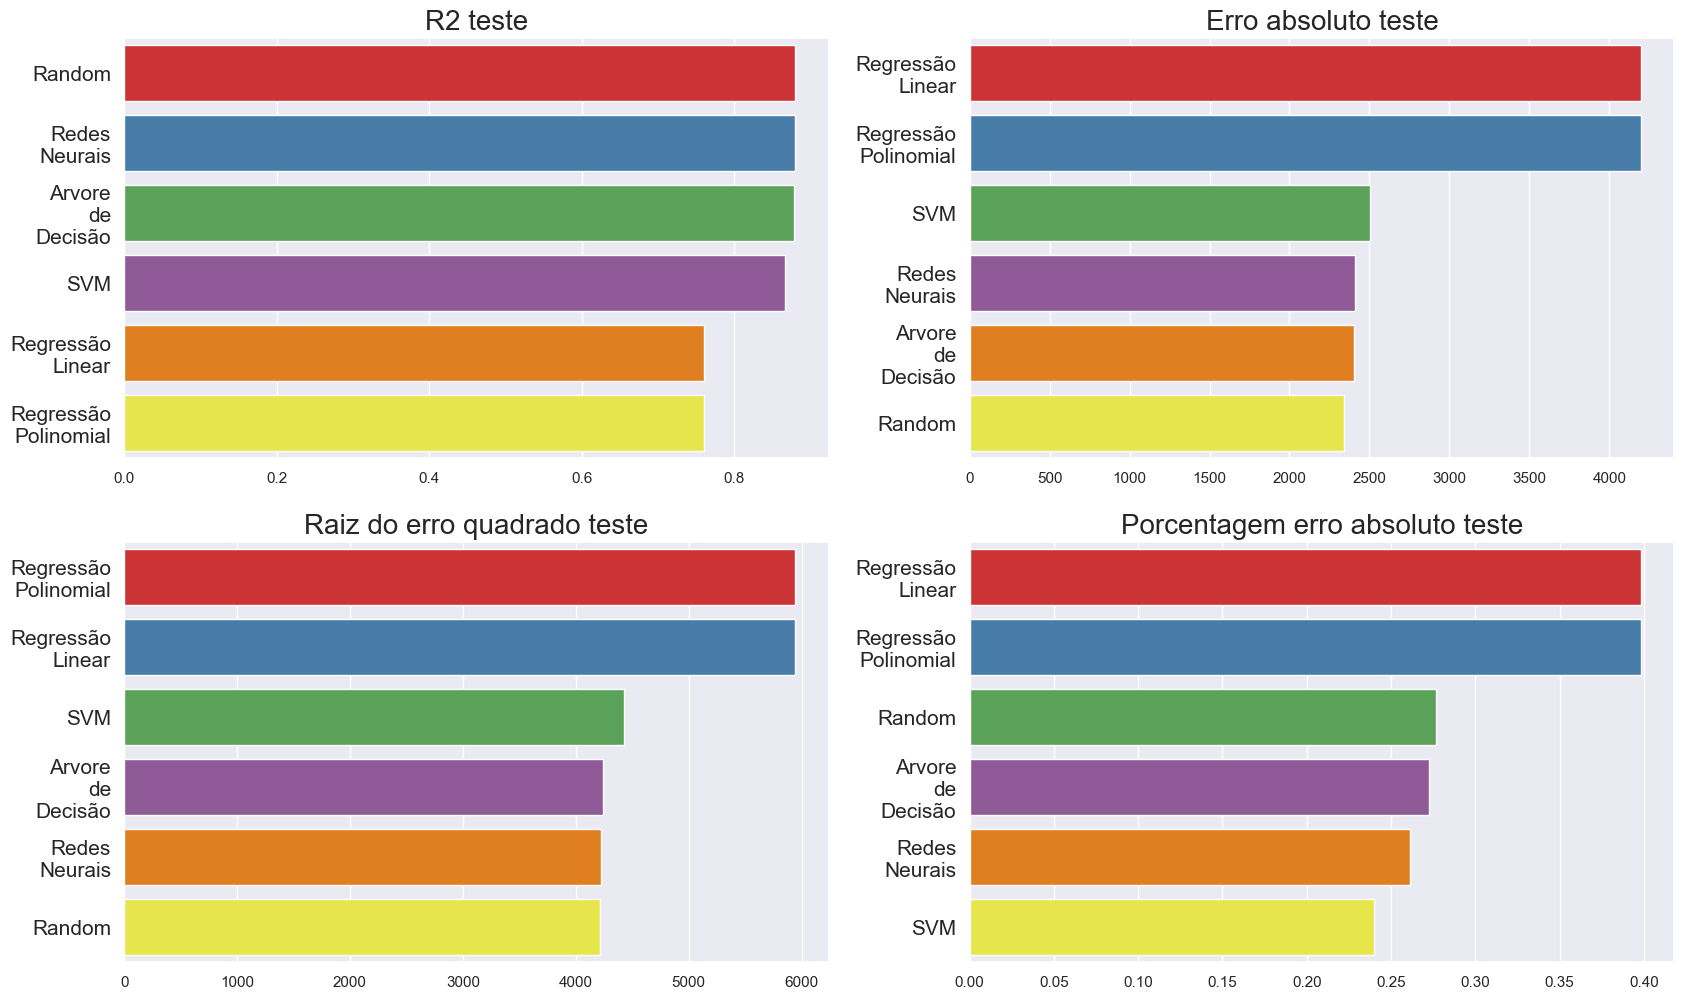

In [86]:
variaveis = ['R2 Teste', 'Erro Absoluto Teste', 'Raiz do Erro Quadrado Teste', 'Porcentagem Erro Absoluto Teste']

# Determining the number of rows and columns for subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,12))

for i, variavel in enumerate(variaveis):
    sns.barplot(y=Dados_Normais[variavel].sort_values(ascending=False).index,
                x=Dados_Normais[variavel].sort_values(ascending=False),
                data=Dados_Normais,
                ax=axs[i // 2, i % 2],
                palette='Set1')
    axs[i // 2, i % 2].set_title(variavel.capitalize(), fontsize=20)
    custom_labels = [algoritmo.replace(' ', '\n') for algoritmo in Dados_Normais[variavel].sort_values(ascending=False).index]
    axs[i // 2, i % 2].set_yticklabels(custom_labels, fontsize=15)
    axs[i // 2, i % 2].set_ylabel('')
    axs[i // 2, i % 2].set_xlabel('')

- O primeiro gráfico mostra o R2(coeficiente de determinação) de cada modelo, o objetivo é quanto maior, melhor. Podemos ver que a regressão polinomial e linear, performaram mal em relação aos outros que praticamente performaram igual.

- O segundo gráfico analisa o Erro absoluto do modelo, ou seja, quanto ele erra para mais ou para menos. Portanto, quanto menor, melhor. Verifica-se que o Random Forest foi o que performou melhor, junto com o SVM e Arvore de decisão.

- O terceiro gráfico analisa a Raiz do erro quadrado, como o mesmo diz, ele verifica a raiz de quanto o nosso modelo erra, ele se diferencia do erro absoluto pois leva em conta não apenas o tamanho da diferença entre os valores reais e previstos, mas também penaliza mais os erros maiores. Quanto menor, melhor. Neste as Redes neurais performaram melhor que svm.

- O quarto gráfico mostra a porcentagem de quanto nosso modelo erra, tendo uma diferença consideravel entre o SVM e Random

## Previsões

O objetivo dos modelos é prever o custo, agora iremos analisar a previsão de cada modelo e verificar o quanto ele erra em relação ao valor real

In [87]:
# Criando um data frame com as previsões
Previsoes = pd.DataFrame({'Valor Real': y_teste, 
                          'Previsao Regressão': previsoes_teste_regressão_linear,
                          'Previsao Polinomial': previsoes_teste_polinomial,
                          'Previsao Arvore': previsoes_teste_arvore,
                          'Previsao Random': previsoes_teste_random,
                          'Previsao SVM': previsoes_teste_svm_inverse.ravel(),
                          'Previsao Redes': previsoes_teste_redes_inverse.ravel()})
Previsoes

,Valor Real,Previsao Regressão,Previsao Polinomial,Previsao Arvore,Previsao Random,Previsao SVM,Previsao Redes
856,40974.16490,35102.488696,35102.488696,43345.830107,44223.515511,37100.510629,42300.365120
778,5934.37980,9032.457686,9032.457686,6125.754797,6139.040739,6488.474273,6754.285846
65,1743.21400,1546.225630,1546.225630,2413.280284,2925.016649,3036.656399,3165.693067
624,12129.61415,12459.558157,12459.558157,14165.935349,13787.620096,13338.228938,13826.057007
1007,24915.22085,34776.481800,34776.481800,28779.089446,26700.555425,31727.662321,28823.508388
...,...,...,...,...,...,...,...
173,5246.04700,8114.541752,8114.541752,6125.754797,5765.444000,6236.810099,4971.977223
1197,5699.83750,8947.963485,8947.963485,7142.738479,6991.906305,6951.754577,6910.039732
539,27346.04207,11352.110400,11352.110400,12007.290383,11339.551460,10703.480214,10376.634485
46,3393.35635,6577.043163,6577.043163,7329.903528,7855.578688,5087.879727,6870.014921


Quanto mais próximos os dados estiverem da linha tracejada vermelha, melhor. Ou seja, quanto mais próximo, significa que a previsão do modelo errou pouco. Sendo inversamente proporcional, quanto mais longe, pior foi a precisão

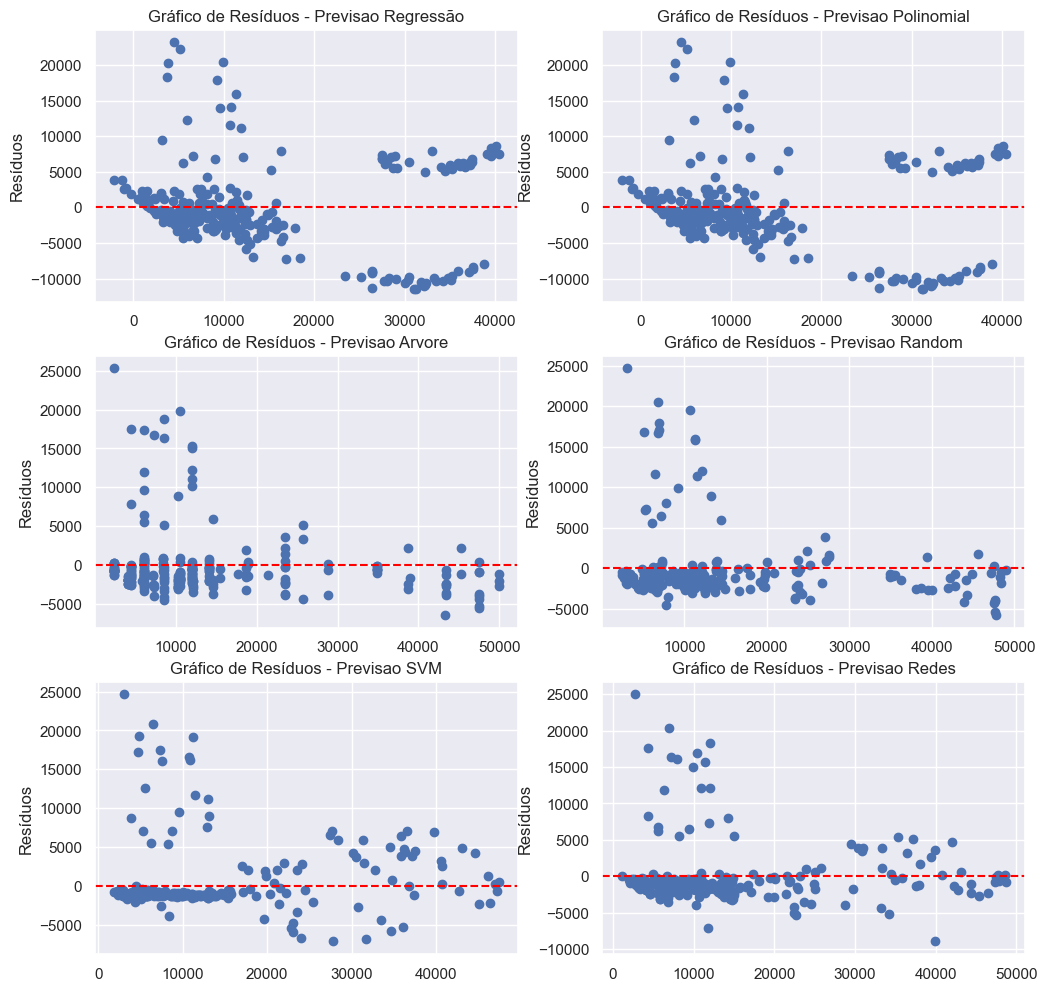

In [92]:
variaveis = ['Previsao Regressão','Previsao Polinomial','Previsao Arvore','Previsao Random','Previsao SVM','Previsao Redes']
residuos = {}

plt.figure

for variavel in variaveis:
    residuos[variavel] = Previsoes['Valor Real'] - Previsoes[variavel]

fig, axs = plt.subplots(3, 2, figsize=(12, 12))

for i, variavel in enumerate(variaveis):
    row, col = divmod(i, 2)
    ax = axs[row, col]
    ax.scatter(Previsoes[variavel], residuos[variavel])
    ax.axhline(y=0, color='red', linestyle='--')
    ax.set_xlabel('')
    ax.set_title(f'Gráfico de Resíduos - {variavel}')
    ax.set_ylabel('Resíduos')

# Conclusão

Ao final do projeto de Machine Learning focado na construção de um modelo preditivo para estimar o custo médico pessoal com base em certas características, realizamos uma análise exploratória de dados detalhada. Identificamos as variáveis "Fumante", "IMC" e "Idade" como as que mais influenciam o valor do custo médico. Por meio de gráficos e testes de hipóteses, obtivemos insights sobre a influência e comportamento dessas colunas em relação à nossa variável resposta.

Após a preparação dos dados e a separação em conjuntos de treino e teste, treinamos diversos modelos de regressão, incluindo Regressão Linear, Regressão Polinomial, Regressão por Árvore de Decisão, Regressão por Random Forest, Regressão por SVM e Regressão por Redes Neurais. O melhor resultado obtido foi uma precisão de 87%, com um erro de aproximadamente 2337, alcançado pelo algoritmo de Random Forest. Apesar do resultado satisfatório, observamos que a baixa quantidade de dados e correlações menos fortes com a variável alvo limitaram o desempenho do modelo.

Em suma, a análise exploratória de dados forneceu informações valiosas para as seguradoras e indivíduos, enquanto a implementação do modelo possibilitou ajustar políticas de cobertura e melhorar o planejamento financeiro relacionado aos custos médicos pessoais. O projeto abriu caminho para futuras melhorias no modelo, com o objetivo de aumentar sua precisão e incorporar mais variáveis relevantes para uma predição ainda mais acurada dos custos médicos pessoais.